# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import folium # package for making maps, please make sure to use a version older than 1.0.0.
# from wordcloud import WordCloud # A package that will allow us to make a wordcloud
from scipy.stats import ttest_ind # A module for Python machine learning--we'll stick to T-Tests here
from IPython.display import display
from folium.plugins import TimeSliderChoropleth
# from time_slider_choropleth import TimeSliderChoropleth
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5)

%matplotlib inline 
sns.set(color_codes=True)

In [3]:
import branca
import geopandas

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Information review Sisben 2021

In [4]:
"""
Import dataframe with information Sisben 2021
"""

sisben_2021 = pd.read_csv("df_sisben_2021.csv", delimiter="~", encoding = 'latin1')

C:\Users\sebas\AppData\Local\Temp\ipykernel_9136\3650272303.py:1: DtypeWarning: Columns (2,4,6,8,9,36,37,42,47,49,50,68,70,75) have mixed types. Specify dtype option on import or set low_memory=False.
  sisben_2021 = pd.read_csv("df_sisben_2021.csv", delimiter="~", encoding = 'latin1')


### Data exploration

In [5]:
"""
Dataframe shape (rows and columns)
"""
sisben_2021.shape

(357448, 78)

In [ ]:
"""
Description dataset by column
"""
sisben_2021.info()

In [ ]:
"""
Dataframe's columns
"""
sisben_2021.columns

In [ ]:
pd.set_option('display.max_columns', None)
sisben_2021.head(5)

In [7]:
# Data exploration by region

print("cantidad de filas por categoría nombre municipio:\n " , sisben_2021["nom_mpio"].value_counts())
print("")
print("cantidad de filas por categoría nombre departamento:\n ", sisben_2021["nom_dpto"].value_counts())
print("")
print("cantidad de filas por categoría código municipio:\n ", sisben_2021["cod_dpto"].value_counts())
print("")
print("cantidad de filas por categoría código departamento:\n ", sisben_2021["cod_mpio"].value_counts())

# Todos los registros deben considerarse dado que corresponden al código del municipio de bucaramanga. Se procede a poblar 
    # las columnas de nombre municipio, código y nombre departamento. 


cantidad de filas por categoría nombre municipio:
  bucaramanga    18418
Name: nom_mpio, dtype: int64

cantidad de filas por categoría nombre departamento:
  santander    18418
Name: nom_dpto, dtype: int64

cantidad de filas por categoría código municipio:
  68.0    18418
Name: cod_dpto, dtype: int64

cantidad de filas por categoría código departamento:
  68001.0    18418
Name: cod_mpio, dtype: int64


In [9]:
"""
Show categories of variables "barrios", "cod_barrios" and NA values for the named variables 
"""

barrios_2021 = sisben_2021["nom_barrio"].unique()
cod_barrios_2021 = sisben_2021["cod_barrio"].unique()
print("cantidad de barrios: ", len(barrios_2021))
print("cantidad cod de barrios: ", len(cod_barrios_2021))
print("")
print("NA en nombre barrio; ", sisben_2021["nom_barrio"].isnull().sum())
print("NA en cod barrio; ", sisben_2021["cod_barrio"].isnull().sum())


cantidad de barrios:  332
cantidad cod de barrios:  311

NA en nombre barrio;  18418
NA en cod barrio;  18418


In [45]:
"""
Show categories of variables "veredas", "cod_veredas" and NA values for the named variables 
"""

veredas_2021 = sisben_2021["nom_vereda"].unique()
cod_veredas_2021 = sisben_2021["cod_vereda"].unique()
print("cantidad de veredas: ", len(veredas_2021))
print("cantidad cod de veredas: ", len(cod_veredas_2021))
print("")
print("NA en nombre vereda; ", sisben_2021["nom_vereda"].isnull().sum())
print("NA en cod vereda; ", sisben_2021["cod_vereda"].isnull().sum())


cantidad de veredas:  66
cantidad cod de veredas:  37

NA en nombre vereda;  18418
NA en cod vereda;  18420


In [42]:
"""
Identify Na values in variables "coordenadas"   
"""

print("Coordenadas eje x NA: ", coord_x_2021.isnull().sum())
print("Coordenadas eje y NA: ", coord_y_2021.isnull().sum())

Coordenadas eje x NA:  144114
Coordenadas eje y NA:  144114


Import Shapes to explorer latitude and longitude

In [15]:
"""
Define path where the file exits
"""
path_barrios_buc = "Barrios_Bucaramanga.geojson"

In [16]:
"""
Read shapes with geopandas
"""
beat_orig = geopandas.read_file(path_barrios_buc, driver = "GeoJSON")

In [ ]:
"""
Show geopandas table
"""

beat_orig

In [21]:
beat_orig["nom_barrio"] = beat_orig["NOMBRE"].str.lower()

In [ ]:
barrios_buc = pd.DataFrame(list(zip(key_barrios_buc)), columns = ['nom_barrio'])

In [52]:
key_barrios_buc = beat_orig.groupby("nom_barrio")[["nom_barrio"]]
type(key_barrios_buc)
key_barrios_buc


In [59]:
sisben_2021_loc = sisben_2021
sisben_2021_loc = sisben_2021_loc.merge(beat_orig, on = "nom_barrio", how= "left")
sisben_2021_loc.columns

In [67]:
""""
Identify rows that no merge between shpaes file and dataframe sisben 2021
""""

sisben2021_nobarrio = sisben_2021_loc[sisben_2021_loc["nom_barrio"].isnull()]

In [ ]:
"""
Show NA values in coordenadas
"""

print(sisben2021_nobarrio["coord_x_auto_enc"].isnull().sum())
print(sisben2021_nobarrio["coord_y_auto_enc"].isnull().sum())

I can identify that the key to merge the information sisben 2021 and shape files to extract latitude and longitude are neighborhoods. There are  18.418 rows with label bucaramanga, but they dont have neighborhood detail. for that reason, we reject that rows.

## Pre-processing Sisben 2021 with neighborhoods

### Crete a subset with rows that have neighborhood label.

In [9]:
sisben2021_barrio = sisben_2021[~sisben_2021["nom_barrio"].isnull()]

sisben2021_barrio.shape # 339.030 registros

In [ ]:
pd.set_option('display.max_columns', None)
sisben2021_barrio.head(3)

In [13]:
"""
Create a subset with target variables
"""

variables_objetivo = ["cod_mpio", "nom_mpio", "cod_dpto", "nom_dpto", "sexo_persona", "nivel_sisben", "bdua_regimen", "tipo_afiliado", "puntaje_sisben_3_trunc",\
    "edad_c", "ind_fondo_pensiones_siv", "tip_actividad_mes_siv", "tip_empleado_siv", "discapacidad", "cod_barrio", "nom_barrio", "cod_vereda", "nom_vereda",\
        "ind_i_1", "ind_i_2", "ind_i_3","ind_i_4","ind_i_5","ind_i_6","ind_i_7","ind_i_8","ind_i_9","ind_i_10","ind_i_11","ind_i_12","ind_i_13","ind_i_14","ind_i_15",\
            "ind_h5", "icbf_ninos_beneficiarios", "icbf_madres_gestantes", "icbf_ninos_venezolanos"]

In [14]:
"""
Filter information with target variables
"""
sisben_2021_obj = sisben2021_barrio[variables_objetivo]

In [ ]:
sisben_2021_obj.info()

In [ ]:
"""
Fill variables municipio and departamento
"""
sisben_2021_obj["cod_mpio"] = sisben_2021_obj["cod_mpio"].fillna(68) 
sisben_2021_obj["cod_dpto"] = sisben_2021_obj["cod_dpto"].fillna(68001) 
sisben_2021_obj["nom_mpio"] = sisben_2021_obj["nom_mpio"].fillna("bucaramanga") 
sisben_2021_obj["nom_dpto"] = sisben_2021_obj["nom_dpto"].fillna("santander") 


Identification and cleaning of rows with missing data (rows with more than 33% of missing data are eliminated,
just as the columns that in their proportion have more than 80% of lost data are eliminated)

In [69]:
filas_perdidas = sisben_2021_obj.loc[:].isna().sum(axis=1)

In [ ]:
print("Total Filas; ", filas_perdidas.value_counts().sum())
filas_perdidas.value_counts()

In [101]:
"""
Identify proportion of missing data for each row
"""

filas_no_eliminar = filas_perdidas < 37/3
cantidad_eliminar = filas_perdidas[filas_perdidas > 37/3]
pct_eliminar = (cantidad_eliminar.value_counts().sum() / filas_perdidas.value_counts().sum())*100
print("Porcentaje de registros con más de 1/3 NA por fila: ", pct_eliminar)
print("cantidad registros con más de 1/3 NA por fila: ", cantidad_eliminar.value_counts().sum())
print("Cantidad registros para modelación: ",round(339030*(1-0.37)) )

Porcentaje de registros con más de 1/3 NA por fila:  37.07518508686547
cantidad registros con más de 1/3 NA por fila:  125696
Cantidad registros para modelación:  213589


In [ ]:
"""
delete information with significative missing data
"""
sisben_2021_obj_depurado = sisben_2021_obj[filas_no_eliminar]

In [ ]:
pd.set_option('display.max_columns', None)
print("icbf_ninos_venezolanos: ", 213257/213589)
print("icbf_madres_gestantes: ", 213257/213589)
print("icbf_ninos_beneficiarios: ", 213257/213589)
sisben_2021_obj_depurado.loc[:].isna().sum(axis=0).sort_values(ascending=False)


Create of subset with target variables and depure missing data

In [29]:
"""
Delete columns with significative missing data
"""
sisben_2021_obj_depurado = sisben_2021_obj_depurado.drop(["icbf_ninos_venezolanos",\
    "icbf_madres_gestantes",\
        "icbf_ninos_beneficiarios"],axis = 1)

NameError: name 'sisben_2021_obj_depurado' is not defined

In [23]:
sisben_2021_obj_depurado = sisben_2021_obj_depurado[~sisben_2021_obj_depurado["tipo_afiliado"].isnull()]

In [ ]:
sisben_2021_obj_depurado.columns

In [ ]:
sisben_2021_obj_depurado.info()

In [27]:
# Checkpoint - Export dataframe
sisben_2021_obj_depurado.to_csv("sisben_2021_obj_depurado.csv", sep="~", index=False, encoding = "latin1")

In [14]:
# checkpoint - Import dataframe with clean data
sisben_2021_obj_depurado = pd.read_csv("sisben_2021_obj_depurado.csv", delimiter="~", encoding = 'latin1')

## Exploring categorical variables and missing data

In [ ]:
sisben_2021_obj_depurado.columns

### Functions to explorer data

In [16]:
def calidad_dato_2021(columna):
"""
Explore categorical variables: identify his ctegories and the NA values
"""


    print("Valores NA: ", sisben_2021_obj_depurado[columna].isnull().sum())
    x = sisben_2021_obj_depurado[columna].value_counts()
    return x

In [30]:
def label_enc(columna):
"""
Encode categorical values
"""

    x = LabelEncoder().fit_transform(sisben_2021_obj_depurado[columna])
    return x

IndentationError: expected an indented block after function definition on line 1 (3687157669.py, line 2)

### Review variables

In [ ]:
calidad_dato_2021("ind_h5")

In [29]:
calidad_dato_2021("tip_actividad_mes_siv")

Valores NA:  0


1.0    77884
3.0    37326
4.0    33452
9.0    24417
2.0    14119
0.0    11619
7.0     5152
6.0     2787
5.0       57
Name: tip_actividad_mes_siv, dtype: int64

In [28]:
calidad_dato_2021("ind_fondo_pensiones_siv")

Valores NA:  0


2.0    136848
9.0     44033
1.0     22956
3.0      2976
Name: ind_fondo_pensiones_siv, dtype: int64

In [ ]:
calidad_dato_2021("tip_empleado_siv")

In [ ]:
np.percentile(sisben_2021_obj_depurado["puntaje_sisben_3_trunc"], 0.5)

In [21]:
calidad_dato_2021('sexo_persona')

Valores NA:  0


2    109392
1     97421
Name: sexo_persona, dtype: int64

In [29]:
calidad_dato_2021("nivel_sisben")

Valores NA:  0


1.0    81276
3.0    76938
2.0    48007
0.0      592
Name: nivel_sisben, dtype: int64

In [36]:
"""
Review and adjustment: variable "bdua regimen"
"""
sisben_2021_obj_depurado['bdua_regimen'] = sisben_2021_obj_depurado['bdua_regimen'].replace(['0', 0], ['subsidiado','subsidiado'])
calidad_dato_2021("bdua_regimen")

Valores NA:  0


subsidiado      108656
contributivo     98157
Name: bdua_regimen, dtype: int64

In [37]:
sisben_2021_obj_depurado['bdua_regimen_labenc'] = LabelEncoder().fit_transform(sisben_2021_obj_depurado['bdua_regimen'])

In [38]:
calidad_dato_2021('bdua_regimen_labenc')

# 0 : subsidiado
# 1 : contributivo

Valores NA:  0


1    108656
0     98157
Name: bdua_regimen_labenc, dtype: int64

In [39]:
"""
Review and adjustment: variables "Tipo afiliado"
"""
calidad_dato_2021("tipo_afiliado")

Valores NA:  0


cabeza de familia                   108480
cotizante                            49399
beneficiario                         48741
adicional                              192
otro miembro del nucleo familiar         1
Name: tipo_afiliado, dtype: int64

In [40]:
sisben_2021_obj_depurado["tipo_afiliado_labenc"] = label_enc("tipo_afiliado")
calidad_dato_2021("tipo_afiliado_labenc")

# 2: cabeza de familia
# 3: cotizantes
# 1: beneficiario
# 0: adicional
# 4: otro miembro del nucleo familiar


Valores NA:  0


2    108480
3     49399
1     48741
0       192
4         1
Name: tipo_afiliado_labenc, dtype: int64

In [41]:
"""
Review and adjustment variable "discapacidad"
"""
calidad_dato_2021("discapacidad")

Valores NA:  0


ninguna       191487
mas de una      8912
una             6414
Name: discapacidad, dtype: int64

In [42]:
sisben_2021_obj_depurado["discapacidad_labenc"] = label_enc("discapacidad")
calidad_dato_2021("discapacidad_labenc")

# 1: Ninguna
# 0: Más de una
# 2: Una


Valores NA:  0


1    191487
0      8912
2      6414
Name: discapacidad_labenc, dtype: int64

### Review transformed dataframe

In [ ]:
sisben_2021_obj_depurado.columns

In [ ]:
pd.set_option('display.max_columns', None)
sisben_2021_obj_depurado.head(5)

In [47]:
# delete original variable because they was transformed.
    # "discapacidad", "bdua_regimen", "tipo_afiliado"

sisben_2021_definitivo = sisben_2021_obj_depurado.drop(["discapacidad",\
    "bdua_regimen",\
        "tipo_afiliado"],axis = 1)

In [ ]:
pd.set_option('display.max_columns', None)
sisben_2021_definitivo.head(5)

checkpint - Export "definitive" datafame

In [51]:
sisben_2021_definitivo.to_csv("sisben_2021_definitivo.csv", sep="~", index=False, encoding = "latin1")

## EDA (Exploratoy data analysis)

In [31]:
#Import definitive dataframe
sisben_2021_definitivo = pd.read_csv("sisben_2021_definitivo.csv", delimiter="~", encoding = 'latin1')

In [ ]:
""" 
Correlation analysis
Exploración de correlaciones
    * Se considera descartar variables que por su naturaleza no son objeto de análisis de correlaciones, como datos espaciales.
    * Por otro lado, se considera excluir la variable de actividad economica en el mes, dado que está postivamente 
        correlacionada con otras variables, como aportes de pensión y tipo de empleado
"""

variables_corr = sisben_2021_definitivo.drop(["cod_mpio","cod_dpto","cod_barrio","cod_vereda","tip_actividad_mes_siv"],axis=1)
sb_2021_corr = variables_corr.corr()
#sb_2021_corr

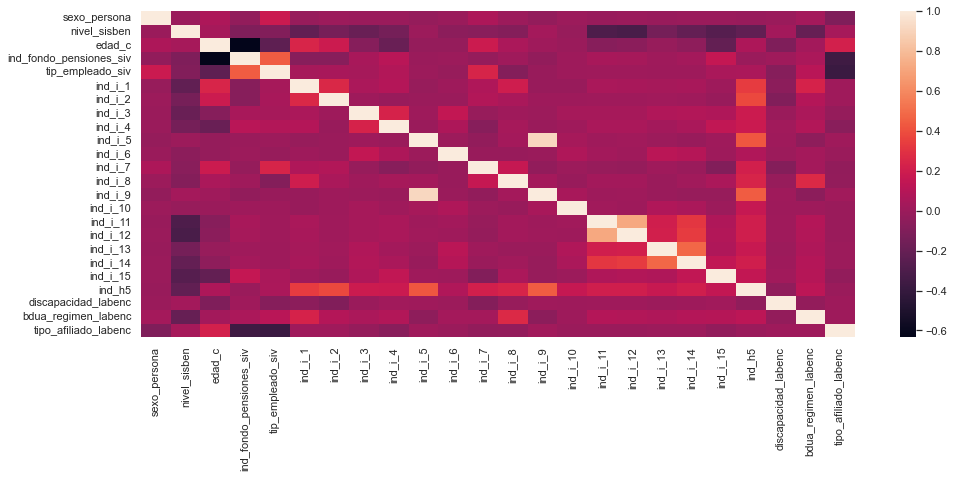

In [75]:
plt.figure(figsize=(16, 6))
sns.heatmap(sb_2021_corr);

<Figure size 1440x1440 with 0 Axes>

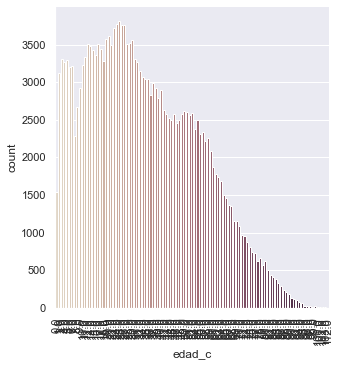

In [87]:
plt.figure(figsize=(20,20 ))
ax = sns.catplot(x="edad_c", kind="count", palette="ch:.25", data=sisben_2021_definitivo)
plt.xticks(rotation=90)
plt.show()

Convert data type "puntaje sisben" to "float" because it is a continuous variable.


In [ ]:
sisben_2021_definitivo['puntaje_sisben_3_trunc'] = sisben_2021_definitivo['puntaje_sisben_3_trunc'].str.replace(",", ".").astype("float")


In [180]:
"""
Descriptive stats
"""
sisben_2021_definitivo['puntaje_sisben_3_trunc'].describe()

count    206813.000000
mean         44.338596
std          17.508133
min           0.000000
25%          31.480000
50%          43.410000
75%          56.920000
max          90.090000
Name: puntaje_sisben_3_trunc, dtype: float64

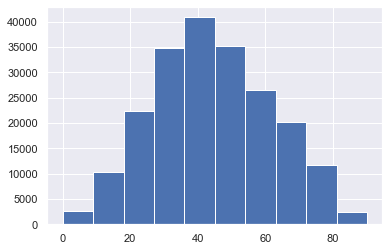

In [208]:
"""
Exploring data distribution
"""
plt.hist(sisben_2021_definitivo['puntaje_sisben_3_trunc'])
plt.show()

## Pre-processing data crime

In [241]:
delitos = pd.read_csv('Delitos_2010_2021.csv')

C:\Users\sebas\AppData\Local\Temp\ipykernel_8660\3999734607.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  delitos = pd.read_csv('Delitos_2010_2021.csv')


In [250]:
delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135076 entries, 0 to 135075
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   ORDEN                   135076 non-null  int64 
 1   ARMAS_MEDIOS            135076 non-null  object
 2   BARRIOS_HECHO           135076 non-null  object
 3   LATITUD                 128713 non-null  object
 4   LONGITUD                128713 non-null  object
 5   ZONA                    135076 non-null  object
 6   NOM_COMUNA              135076 non-null  object
 7   ANO                     135076 non-null  int64 
 8   MES                     135076 non-null  object
 9   DIA                     135076 non-null  int64 
 10  DIA_SEMANA              135076 non-null  object
 11  DESCRIPCION_CONDUCTA    135076 non-null  object
 12  CONDUCTA                135076 non-null  object
 13  CLASIFICACIONES DELITO  135076 non-null  object
 14  EDAD                    135076 non-n

In [251]:
delitos.head(6)

,ORDEN,ARMAS_MEDIOS,BARRIOS_HECHO,LATITUD,LONGITUD,ZONA,NOM_COMUNA,ANO,MES,DIA,DIA_SEMANA,DESCRIPCION_CONDUCTA,CONDUCTA,CLASIFICACIONES DELITO,EDAD,CURSO_DE_VIDA,ESTADO_CIVIL_PERSONA,GENERO,MOVIL_AGRESOR,MOVIL_VICTIMA
0,1,ARMA BLANCA / CORTOPUNZANTE,BUENOS AIRES,7.170557,-73.135108,URBANA,14. Morrorico,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,30,05. Adultez,UNION LIBRE,MASCULINO,A PIE,A PIE
1,2,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,21,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
2,3,ARMA BLANCA / CORTOPUNZANTE,CAMPO HERMOSO,7.120645,-73.12605,URBANA,05. García Rovira,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,23,04. Jovenes,SOLTERO,MASCULINO,A PIE,A PIE
3,4,ARMA BLANCA / CORTOPUNZANTE,COMUNEROS,7.151359,-73.145705,URBANA,03. San Francisco,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,36,05. Adultez,CASADO,MASCULINO,A PIE,A PIE
4,5,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,7.170557,-73.135108,URBANA,04. Occidental,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,20,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE
5,6,ARMA BLANCA / CORTOPUNZANTE,GIRARDOT,7.170557,-73.135108,URBANA,04. Occidental,2010,01. Enero,1,05. Viernes,ARTÍCULO 111. LESIONES PERSONALES,LESIONES PERSONALES,Lesiones no fatales,20,04. Jovenes,UNION LIBRE,MASCULINO,A PIE,A PIE


In [ ]:
# No se tiene filas con pérdida de datos significativa
delitos_filas_perdidas = delitos.loc[:].isna().sum(axis=1).sort_values(ascending=False)
delitos_filas_perdidas.head(10)

In [258]:
delitos2021 = delitos[delitos["ANO"] == 2021]

In [260]:
delitos2021_grouped_barrios = delitos2021.groupby("BARRIOS_HECHO")["ORDEN"].count().reset_index()
delitos2021_grouped_barrios["BARRIOS_HECHO"] = delitos2021_grouped_barrios["BARRIOS_HECHO"].str.lower()
delitos2021_grouped_barrios

,BARRIOS_HECHO,ORDEN
0,12 de octubre,15
1,13 de junio,1
2,20 de julio,3
3,23 de junio,11
4,africa,3
...,...,...
332,villas del nogal,3
333,vrda abejas,1
334,vrda capilla,1
335,vrda jaboncillo,1


Export table with crime by neighborhood

In [261]:
delitos2021_grouped_barrios.to_csv("delitos2021_grouped_barrios.csv", sep="~", index=False, encoding = "latin1")

## Pre-processing gender violence

In [262]:
violencia_genero = pd.read_csv('Violencia_G_2015_2022.csv')

In [278]:
print("shape del dataframe: ", violencia_genero.shape)
violencia_genero.info()

shape del dataframe:  (10520, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Orden                     10520 non-null  int64  
 1   Departamento              10520 non-null  object 
 2   Municipio                 10520 non-null  object 
 3   semana                    10520 non-null  int64  
 4   año                       10520 non-null  int64  
 5   Grupo edad                10520 non-null  object 
 6   Ciclo de vida             10520 non-null  object 
 7   sexo_                     10520 non-null  object 
 8   area_                     10520 non-null  int64  
 9   Barrio                    33 non-null     object 
 10  Comuna                    33 non-null     object 
 11  Tipo de Seguridad Social  10520 non-null  object 
 12  pac_hos_                  10520 non-null  int64  
 13  con_fin_                  1

In [ ]:
violencia_genero["Barrio"].value_counts()

In [276]:
violencia_genero.columns

Index(['Orden', 'Departamento', 'Municipio', 'semana', 'año', 'Grupo edad',
       'Ciclo de vida', 'sexo_', 'area_', 'Barrio', 'Comuna',
       'Tipo de Seguridad Social', 'pac_hos_', 'con_fin_', 'version',
       'naturaleza', 'def_naturaleza', 'actividad', 'nom_actividad',
       'edad_agre', 'sexo_agre', 'parentezco_vict', 'sust_vict', 'fec_hecho',
       'hora_hecho', 'escenario', 'zona_conf', 'nom_eve', 'nom_upgd',
       'ndep_resi', 'nmun_resi', 'MES'],
      dtype='object')

In [ ]:
violencia_genero.head(3)

The table violence by gender doesnt have enough information to merge with key neighborhood. For that reason, it's no considered to "clustering".

## Transform información to model

Funciones

In [7]:
def normalize(df):

    """ La función "normalize" permite normalizar los datos inputs mediante el método: "min-max scaling method".
        Normalize information with the method "min-max scaling method
    """
    result = df.copy()
    
    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)
        
    return result

In [ ]:
sisben_2021_definitivo.info()

In [ ]:
sisben_2021_definitivo.columns

### One hot enconding & Grouped by "Barrio"

In [603]:
sisben_2021_definitivo = pd.read_csv("sisben_2021_definitivo.csv", delimiter="~", encoding = 'latin1')

#### Categorical variables

In [604]:
sisben_2021_definitivo_cat =sisben_2021_definitivo.drop(["puntaje_sisben_3_trunc"],axis=1) 
#sisben_2021_definitivo_cat.head(2)

In [605]:
sisben_2021_premodel_cat = pd.get_dummies(sisben_2021_definitivo_cat, columns = ['nivel_sisben', 'ind_fondo_pensiones_siv', 'tip_empleado_siv',
       'ind_i_1','ind_i_2', 'ind_i_3', 'ind_i_4', 'ind_i_5', 'ind_i_6', 'ind_i_7',
       'ind_i_8', 'ind_i_9', 'ind_i_10', 'ind_i_11', 'ind_i_12', 'ind_i_13',
       'ind_i_14', 'ind_i_15', 'ind_h5', 'discapacidad_labenc',
       'bdua_regimen_labenc', 'tipo_afiliado_labenc']) # Variable dummy para categóricas

In [606]:
sisben_2021_premodel_cat = sisben_2021_premodel_cat.drop(["tip_actividad_mes_siv","edad_c","sexo_persona"],axis=1)
sisben_2021_premodel_cat.head(3)

,cod_mpio,nom_mpio,cod_dpto,nom_dpto,cod_barrio,nom_barrio,cod_vereda,nom_vereda,nivel_sisben_0.0,nivel_sisben_1.0,nivel_sisben_2.0,nivel_sisben_3.0,ind_fondo_pensiones_siv_1.0,ind_fondo_pensiones_siv_2.0,ind_fondo_pensiones_siv_3.0,ind_fondo_pensiones_siv_9.0,tip_empleado_siv_1.0,tip_empleado_siv_2.0,tip_empleado_siv_3.0,tip_empleado_siv_4.0,tip_empleado_siv_5.0,tip_empleado_siv_6.0,tip_empleado_siv_7.0,tip_empleado_siv_8.0,tip_empleado_siv_9.0,tip_empleado_siv_10.0,tip_empleado_siv_99.0,ind_i_1_0.0,ind_i_1_1.0,ind_i_2_0.0,ind_i_2_1.0,ind_i_3_0.0,ind_i_3_1.0,ind_i_4_0.0,ind_i_4_1.0,ind_i_5_0.0,ind_i_5_1.0,ind_i_6_0.0,ind_i_6_1.0,ind_i_7_0.0,ind_i_7_1.0,ind_i_8_0.0,ind_i_8_1.0,ind_i_9_0.0,ind_i_9_1.0,ind_i_10_0.0,ind_i_10_1.0,ind_i_11_0.0,ind_i_11_1.0,ind_i_12_0.0,ind_i_12_1.0,ind_i_13_0.0,ind_i_13_1.0,ind_i_14_0.0,ind_i_14_1.0,ind_i_15_0.0,ind_i_15_1.0,ind_h5_0.0,ind_h5_1.0,discapacidad_labenc_0,discapacidad_labenc_1,discapacidad_labenc_2,bdua_regimen_labenc_0,bdua_regimen_labenc_1,tipo_afiliado_labenc_0,tipo_afiliado_labenc_1,tipo_afiliado_labenc_2,tipo_afiliado_labenc_3,tipo_afiliado_labenc_4
0,68.0,bucaramanga,68001.0,santander,145.0,campo hermoso,0.0,sin vereda,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0
1,68.0,bucaramanga,68001.0,santander,193.0,nueva granada,0.0,sin vereda,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0
2,68.0,bucaramanga,68001.0,santander,142.0,alfonso lopez,0.0,sin vereda,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0




sisben_2021_premodel_cat = pd.get_dummies(sisben_2021_definitivo_cat, columns = ['sexo_persona',
       'nivel_sisben', 'edad_c', 'ind_fondo_pensiones_siv', 'tip_actividad_mes_siv', 'tip_empleado_siv',
       'ind_i_1','ind_i_2', 'ind_i_3', 'ind_i_4', 'ind_i_5', 'ind_i_6', 'ind_i_7',
       'ind_i_8', 'ind_i_9', 'ind_i_10', 'ind_i_11', 'ind_i_12', 'ind_i_13',
       'ind_i_14', 'ind_i_15', 'ind_h5', 'discapacidad_labenc',
       'bdua_regimen_labenc', 'tipo_afiliado_labenc']) # Variable dummy para categóricas


In [607]:
sisben_2021_premodel_cat_grouped = sisben_2021_premodel_cat.groupby(['cod_barrio','nom_barrio']).sum().reset_index()

In [608]:
pd.set_option('display.max_columns', None)
print(sisben_2021_premodel_cat_grouped.shape)
sisben_2021_premodel_cat_grouped.head(5)

(223, 66)


,cod_barrio,nom_barrio,cod_mpio,cod_dpto,cod_vereda,nivel_sisben_0.0,nivel_sisben_1.0,nivel_sisben_2.0,nivel_sisben_3.0,ind_fondo_pensiones_siv_1.0,ind_fondo_pensiones_siv_2.0,ind_fondo_pensiones_siv_3.0,ind_fondo_pensiones_siv_9.0,tip_empleado_siv_1.0,tip_empleado_siv_2.0,tip_empleado_siv_3.0,tip_empleado_siv_4.0,tip_empleado_siv_5.0,tip_empleado_siv_6.0,tip_empleado_siv_7.0,tip_empleado_siv_8.0,tip_empleado_siv_9.0,tip_empleado_siv_10.0,tip_empleado_siv_99.0,ind_i_1_0.0,ind_i_1_1.0,ind_i_2_0.0,ind_i_2_1.0,ind_i_3_0.0,ind_i_3_1.0,ind_i_4_0.0,ind_i_4_1.0,ind_i_5_0.0,ind_i_5_1.0,ind_i_6_0.0,ind_i_6_1.0,ind_i_7_0.0,ind_i_7_1.0,ind_i_8_0.0,ind_i_8_1.0,ind_i_9_0.0,ind_i_9_1.0,ind_i_10_0.0,ind_i_10_1.0,ind_i_11_0.0,ind_i_11_1.0,ind_i_12_0.0,ind_i_12_1.0,ind_i_13_0.0,ind_i_13_1.0,ind_i_14_0.0,ind_i_14_1.0,ind_i_15_0.0,ind_i_15_1.0,ind_h5_0.0,ind_h5_1.0,discapacidad_labenc_0,discapacidad_labenc_1,discapacidad_labenc_2,bdua_regimen_labenc_0,bdua_regimen_labenc_1,tipo_afiliado_labenc_0,tipo_afiliado_labenc_1,tipo_afiliado_labenc_2,tipo_afiliado_labenc_3,tipo_afiliado_labenc_4
0,0.0,sin barrio,595204.0,595212753.0,2276400.0,6.0,6383.0,1745.0,619.0,741.0,6058.0,55.0,1899.0,960.0,18.0,100.0,1.0,968.0,12.0,131.0,19.0,14.0,479.0,6051.0,2833.0,5920.0,7710.0,1043.0,8293.0,460.0,6584.0,2169.0,6864.0,1889.0,8703.0,50.0,7852.0,901.0,2715.0,6038.0,7061.0,1692.0,8451.0,302.0,2619.0,6134.0,5345.0,3408.0,7944.0,809.0,8528.0,225.0,7308.0,1445.0,6323.0,2430.0,223.0,8244.0,286.0,3473.0,5280.0,13.0,1741.0,5307.0,1692.0,0.0
1,1.0,el paulon villa patricia,24208.0,24208356.0,0.0,0.0,221.0,80.0,55.0,24.0,242.0,0.0,90.0,31.0,1.0,6.0,1.0,74.0,3.0,1.0,5.0,0.0,4.0,230.0,134.0,222.0,323.0,33.0,311.0,45.0,264.0,92.0,299.0,57.0,349.0,7.0,315.0,41.0,55.0,301.0,310.0,46.0,348.0,8.0,234.0,122.0,200.0,156.0,303.0,53.0,312.0,44.0,263.0,93.0,260.0,96.0,17.0,330.0,9.0,138.0,218.0,0.0,66.0,218.0,72.0,0.0
2,2.0,el paulon villa lina,58276.0,58276857.0,0.0,1.0,496.0,179.0,181.0,73.0,588.0,2.0,194.0,87.0,1.0,15.0,0.0,216.0,3.0,1.0,1.0,1.0,14.0,518.0,278.0,579.0,756.0,101.0,784.0,73.0,678.0,179.0,722.0,135.0,857.0,0.0,797.0,60.0,138.0,719.0,744.0,113.0,830.0,27.0,576.0,281.0,536.0,321.0,750.0,107.0,580.0,277.0,491.0,366.0,567.0,290.0,27.0,812.0,18.0,287.0,570.0,1.0,132.0,568.0,156.0,0.0
3,3.0,colorados,156128.0,156130296.0,0.0,0.0,637.0,545.0,1114.0,272.0,1494.0,35.0,495.0,291.0,6.0,38.0,4.0,463.0,15.0,7.0,10.0,0.0,11.0,1451.0,1004.0,1292.0,2070.0,226.0,2206.0,90.0,1899.0,397.0,1993.0,303.0,2281.0,15.0,2059.0,237.0,664.0,1632.0,2058.0,238.0,2217.0,79.0,2158.0,138.0,2211.0,85.0,2283.0,13.0,2277.0,19.0,1763.0,533.0,1991.0,305.0,124.0,2134.0,38.0,1209.0,1087.0,0.0,611.0,1091.0,594.0,0.0
4,4.0,el paulon,66708.0,66708981.0,0.0,1.0,571.0,203.0,206.0,67.0,695.0,6.0,213.0,96.0,1.0,25.0,0.0,219.0,0.0,4.0,0.0,1.0,8.0,627.0,287.0,694.0,822.0,159.0,910.0,71.0,741.0,240.0,862.0,119.0,973.0,8.0,886.0,95.0,155.0,826.0,894.0,87.0,936.0,45.0,880.0,101.0,606.0,375.0,944.0,37.0,919.0,62.0,662.0,319.0,737.0,244.0,56.0,891.0,34.0,373.0,608.0,0.0,197.0,605.0,179.0,0.0


#### Continuous variables

In [609]:
sisben_2021_definitivo_cont = sisben_2021_definitivo[['cod_barrio','nom_barrio','puntaje_sisben_3_trunc']]
sisben_2021_definitivo_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206813 entries, 0 to 206812
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   cod_barrio              206813 non-null  float64
 1   nom_barrio              206813 non-null  object 
 2   puntaje_sisben_3_trunc  206813 non-null  object 
dtypes: float64(1), object(2)
memory usage: 4.7+ MB


In [610]:
sisben_2021_definitivo_cont['puntaje_sisben_3_trunc'] = sisben_2021_definitivo_cont['puntaje_sisben_3_trunc'].str.replace(",", ".").astype("float")


C:\Users\sebas\AppData\Local\Temp\ipykernel_12572\4127203811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sisben_2021_definitivo_cont['puntaje_sisben_3_trunc'] = sisben_2021_definitivo_cont['puntaje_sisben_3_trunc'].str.replace(",", ".").astype("float")


In [611]:
"""
The average is considered as a measure of central tendency because the distribution of the sisben score is normal..
"""

sisben_2021_premodel_cont_grouped = sisben_2021_definitivo_cont.groupby('cod_barrio')["puntaje_sisben_3_trunc"].mean().reset_index()
sisben_2021_premodel_cont_grouped.head()


,cod_barrio,puntaje_sisben_3_trunc
0,0.0,31.186990
1,1.0,35.648006
2,2.0,35.362380
3,3.0,49.395832
4,4.0,37.382793


Join grouped tables with categorical and continuos variables

In [612]:
sisben_2021_model = sisben_2021_premodel_cat_grouped.merge(sisben_2021_premodel_cont_grouped, 
on = "cod_barrio", how = "left" )

In [613]:
pd.set_option('display.max_columns', None)
sisben_2021_model.head()

,cod_barrio,nom_barrio,cod_mpio,cod_dpto,cod_vereda,nivel_sisben_0.0,nivel_sisben_1.0,nivel_sisben_2.0,nivel_sisben_3.0,ind_fondo_pensiones_siv_1.0,ind_fondo_pensiones_siv_2.0,ind_fondo_pensiones_siv_3.0,ind_fondo_pensiones_siv_9.0,tip_empleado_siv_1.0,tip_empleado_siv_2.0,tip_empleado_siv_3.0,tip_empleado_siv_4.0,tip_empleado_siv_5.0,tip_empleado_siv_6.0,tip_empleado_siv_7.0,tip_empleado_siv_8.0,tip_empleado_siv_9.0,tip_empleado_siv_10.0,tip_empleado_siv_99.0,ind_i_1_0.0,ind_i_1_1.0,ind_i_2_0.0,ind_i_2_1.0,ind_i_3_0.0,ind_i_3_1.0,ind_i_4_0.0,ind_i_4_1.0,ind_i_5_0.0,ind_i_5_1.0,ind_i_6_0.0,ind_i_6_1.0,ind_i_7_0.0,ind_i_7_1.0,ind_i_8_0.0,ind_i_8_1.0,ind_i_9_0.0,ind_i_9_1.0,ind_i_10_0.0,ind_i_10_1.0,ind_i_11_0.0,ind_i_11_1.0,ind_i_12_0.0,ind_i_12_1.0,ind_i_13_0.0,ind_i_13_1.0,ind_i_14_0.0,ind_i_14_1.0,ind_i_15_0.0,ind_i_15_1.0,ind_h5_0.0,ind_h5_1.0,discapacidad_labenc_0,discapacidad_labenc_1,discapacidad_labenc_2,bdua_regimen_labenc_0,bdua_regimen_labenc_1,tipo_afiliado_labenc_0,tipo_afiliado_labenc_1,tipo_afiliado_labenc_2,tipo_afiliado_labenc_3,tipo_afiliado_labenc_4,puntaje_sisben_3_trunc
0,0.0,sin barrio,595204.0,595212753.0,2276400.0,6.0,6383.0,1745.0,619.0,741.0,6058.0,55.0,1899.0,960.0,18.0,100.0,1.0,968.0,12.0,131.0,19.0,14.0,479.0,6051.0,2833.0,5920.0,7710.0,1043.0,8293.0,460.0,6584.0,2169.0,6864.0,1889.0,8703.0,50.0,7852.0,901.0,2715.0,6038.0,7061.0,1692.0,8451.0,302.0,2619.0,6134.0,5345.0,3408.0,7944.0,809.0,8528.0,225.0,7308.0,1445.0,6323.0,2430.0,223.0,8244.0,286.0,3473.0,5280.0,13.0,1741.0,5307.0,1692.0,0.0,31.186990
1,1.0,el paulon villa patricia,24208.0,24208356.0,0.0,0.0,221.0,80.0,55.0,24.0,242.0,0.0,90.0,31.0,1.0,6.0,1.0,74.0,3.0,1.0,5.0,0.0,4.0,230.0,134.0,222.0,323.0,33.0,311.0,45.0,264.0,92.0,299.0,57.0,349.0,7.0,315.0,41.0,55.0,301.0,310.0,46.0,348.0,8.0,234.0,122.0,200.0,156.0,303.0,53.0,312.0,44.0,263.0,93.0,260.0,96.0,17.0,330.0,9.0,138.0,218.0,0.0,66.0,218.0,72.0,0.0,35.648006
2,2.0,el paulon villa lina,58276.0,58276857.0,0.0,1.0,496.0,179.0,181.0,73.0,588.0,2.0,194.0,87.0,1.0,15.0,0.0,216.0,3.0,1.0,1.0,1.0,14.0,518.0,278.0,579.0,756.0,101.0,784.0,73.0,678.0,179.0,722.0,135.0,857.0,0.0,797.0,60.0,138.0,719.0,744.0,113.0,830.0,27.0,576.0,281.0,536.0,321.0,750.0,107.0,580.0,277.0,491.0,366.0,567.0,290.0,27.0,812.0,18.0,287.0,570.0,1.0,132.0,568.0,156.0,0.0,35.362380
3,3.0,colorados,156128.0,156130296.0,0.0,0.0,637.0,545.0,1114.0,272.0,1494.0,35.0,495.0,291.0,6.0,38.0,4.0,463.0,15.0,7.0,10.0,0.0,11.0,1451.0,1004.0,1292.0,2070.0,226.0,2206.0,90.0,1899.0,397.0,1993.0,303.0,2281.0,15.0,2059.0,237.0,664.0,1632.0,2058.0,238.0,2217.0,79.0,2158.0,138.0,2211.0,85.0,2283.0,13.0,2277.0,19.0,1763.0,533.0,1991.0,305.0,124.0,2134.0,38.0,1209.0,1087.0,0.0,611.0,1091.0,594.0,0.0,49.395832
4,4.0,el paulon,66708.0,66708981.0,0.0,1.0,571.0,203.0,206.0,67.0,695.0,6.0,213.0,96.0,1.0,25.0,0.0,219.0,0.0,4.0,0.0,1.0,8.0,627.0,287.0,694.0,822.0,159.0,910.0,71.0,741.0,240.0,862.0,119.0,973.0,8.0,886.0,95.0,155.0,826.0,894.0,87.0,936.0,45.0,880.0,101.0,606.0,375.0,944.0,37.0,919.0,62.0,662.0,319.0,737.0,244.0,56.0,891.0,34.0,373.0,608.0,0.0,197.0,605.0,179.0,0.0,37.382793


checkpoint - Export table previous to normalize and modelling

In [675]:
#sisben_2021_model.to_csv("sisben_2021_model.csv", sep="~", index=False, encoding = "latin1")
sisben_2021_model.to_csv("sisben_2021_model_v_04072022.csv", sep="~", index=False, encoding = "latin1")

## Modelling Sisben 2021

Import data to model - Inner join between tables

* Nombre tabla del Sisben: sisben_2021_model.csv
* Nombre tabla delitos: delitos2021_grouped_barrios
* Nombre tabla de violencia género: Los datos no tiene detalle de barrio.

In [318]:
#Importar dataframe definitivo
sisben_2021_model = pd.read_csv("sisben_2021_model_v2.csv", delimiter="~", encoding = 'latin1')
#sisben_2021_model = pd.read_csv("sisben_2021_model.csv", delimiter="~", encoding = 'latin1')



In [691]:
sisben_2021_definitivo = pd.read_csv("sisben_2021_definitivo.csv", delimiter="~", encoding = 'latin1')
sisben_2021_definitivo_grouped = sisben_2021_definitivo.groupby(["cod_barrio","nom_barrio"]).sum().reset_index()
sisben_2021_definitivo_grouped.drop([0],axis=0,inplace=True)
sisben_2021_definitivo_grouped.head(2)

,cod_barrio,nom_barrio,cod_mpio,cod_dpto,sexo_persona,nivel_sisben,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,cod_vereda,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_h5,discapacidad_labenc,bdua_regimen_labenc,tipo_afiliado_labenc
1,1.0,el paulon villa patricia,24208.0,24208356.0,543,546.0,10885.0,1318.0,1208.0,23300.0,0.0,222.0,33.0,45.0,92.0,57.0,7.0,41.0,301.0,46.0,8.0,122.0,156.0,53.0,44.0,93.0,96.0,348,218,718
2,2.0,el paulon villa lina,58276.0,58276857.0,1298,1397.0,26729.0,3001.0,2633.0,52678.0,0.0,579.0,101.0,73.0,179.0,135.0,0.0,60.0,719.0,113.0,27.0,281.0,321.0,107.0,277.0,366.0,290.0,848,570,1736


In [223]:
# The rows that do not correspond to a specific neighborhood, i.e., records without a neighborhood, are eliminated.
# sisben_2021_model2 = sisben_2021_model.drop([0,222],axis=0)
# sisben_2021_model2

#### Crime data validation

In [281]:
delitos2021_grouped_barrios.head(2)

,BARRIOS_HECHO,ORDEN
0,12 de octubre,15
1,13 de junio,1


In [282]:
""" 
Left join between sisben data table and crimes for the year 2021, bucaramanga city.
"""
df = sisben_2021_model.merge(delitos2021_grouped_barrios,left_on = "nom_barrio", right_on="BARRIOS_HECHO",
    how="left")

In [304]:
""" 
Identify the rows that did not cross between the sisben table and crimes.
"""
print("Cantidad de filas: ", df["BARRIOS_HECHO"].isna().sum())
print("Proporción de filas: ", df["BARRIOS_HECHO"].isna().sum() / len(df["BARRIOS_HECHO"]))

# It was only possible to cross-reference the sisten information with the crime table in 51% of cases. An attempt was made to 
# The manual homologation of the neighborhood, but many do not match, so there is a selection bias.
# We will proceed to model only with the information from the SISBEN.

Cantidad de filas:  111
Proporción de filas:  0.4977578475336323


In [ ]:
revision_barrios_delitos = df[df["BARRIOS_HECHO"].isna()]
revision_barrios_delitos["nom_barrio"]

In [313]:
revision_barrios_delitos["nom_barrio"].to_csv("revision_barrios_delitos.csv",encoding = "latin1")

In [314]:
delitos2021_grouped_barrios["BARRIOS_HECHO"].to_csv("barrios_delitos.csv",encoding = "latin1")

In [ ]:
pd.set_option('display.max_columns', None)
df.head(5)

In [284]:
df["ORDEN"].isna().sum()

111

### Normalize columns

In [615]:
df = sisben_2021_model.drop(["cod_mpio","cod_dpto","cod_vereda","nom_barrio"],axis=1)

In [617]:
df = df.drop(["cod_barrio"],axis=1)
df 

,nivel_sisben_0.0,nivel_sisben_1.0,nivel_sisben_2.0,nivel_sisben_3.0,ind_fondo_pensiones_siv_1.0,ind_fondo_pensiones_siv_2.0,ind_fondo_pensiones_siv_3.0,ind_fondo_pensiones_siv_9.0,tip_empleado_siv_1.0,tip_empleado_siv_2.0,tip_empleado_siv_3.0,tip_empleado_siv_4.0,tip_empleado_siv_5.0,tip_empleado_siv_6.0,tip_empleado_siv_7.0,tip_empleado_siv_8.0,tip_empleado_siv_9.0,tip_empleado_siv_10.0,tip_empleado_siv_99.0,ind_i_1_0.0,ind_i_1_1.0,ind_i_2_0.0,ind_i_2_1.0,ind_i_3_0.0,ind_i_3_1.0,ind_i_4_0.0,ind_i_4_1.0,ind_i_5_0.0,ind_i_5_1.0,ind_i_6_0.0,ind_i_6_1.0,ind_i_7_0.0,ind_i_7_1.0,ind_i_8_0.0,ind_i_8_1.0,ind_i_9_0.0,ind_i_9_1.0,ind_i_10_0.0,ind_i_10_1.0,ind_i_11_0.0,ind_i_11_1.0,ind_i_12_0.0,ind_i_12_1.0,ind_i_13_0.0,ind_i_13_1.0,ind_i_14_0.0,ind_i_14_1.0,ind_i_15_0.0,ind_i_15_1.0,ind_h5_0.0,ind_h5_1.0,discapacidad_labenc_0,discapacidad_labenc_1,discapacidad_labenc_2,bdua_regimen_labenc_0,bdua_regimen_labenc_1,tipo_afiliado_labenc_0,tipo_afiliado_labenc_1,tipo_afiliado_labenc_2,tipo_afiliado_labenc_3,tipo_afiliado_labenc_4,puntaje_sisben_3_trunc
0,6.0,6383.0,1745.0,619.0,741.0,6058.0,55.0,1899.0,960.0,18.0,100.0,1.0,968.0,12.0,131.0,19.0,14.0,479.0,6051.0,2833.0,5920.0,7710.0,1043.0,8293.0,460.0,6584.0,2169.0,6864.0,1889.0,8703.0,50.0,7852.0,901.0,2715.0,6038.0,7061.0,1692.0,8451.0,302.0,2619.0,6134.0,5345.0,3408.0,7944.0,809.0,8528.0,225.0,7308.0,1445.0,6323.0,2430.0,223.0,8244.0,286.0,3473.0,5280.0,13.0,1741.0,5307.0,1692.0,0.0,31.186990
1,0.0,221.0,80.0,55.0,24.0,242.0,0.0,90.0,31.0,1.0,6.0,1.0,74.0,3.0,1.0,5.0,0.0,4.0,230.0,134.0,222.0,323.0,33.0,311.0,45.0,264.0,92.0,299.0,57.0,349.0,7.0,315.0,41.0,55.0,301.0,310.0,46.0,348.0,8.0,234.0,122.0,200.0,156.0,303.0,53.0,312.0,44.0,263.0,93.0,260.0,96.0,17.0,330.0,9.0,138.0,218.0,0.0,66.0,218.0,72.0,0.0,35.648006
2,1.0,496.0,179.0,181.0,73.0,588.0,2.0,194.0,87.0,1.0,15.0,0.0,216.0,3.0,1.0,1.0,1.0,14.0,518.0,278.0,579.0,756.0,101.0,784.0,73.0,678.0,179.0,722.0,135.0,857.0,0.0,797.0,60.0,138.0,719.0,744.0,113.0,830.0,27.0,576.0,281.0,536.0,321.0,750.0,107.0,580.0,277.0,491.0,366.0,567.0,290.0,27.0,812.0,18.0,287.0,570.0,1.0,132.0,568.0,156.0,0.0,35.362380
3,0.0,637.0,545.0,1114.0,272.0,1494.0,35.0,495.0,291.0,6.0,38.0,4.0,463.0,15.0,7.0,10.0,0.0,11.0,1451.0,1004.0,1292.0,2070.0,226.0,2206.0,90.0,1899.0,397.0,1993.0,303.0,2281.0,15.0,2059.0,237.0,664.0,1632.0,2058.0,238.0,2217.0,79.0,2158.0,138.0,2211.0,85.0,2283.0,13.0,2277.0,19.0,1763.0,533.0,1991.0,305.0,124.0,2134.0,38.0,1209.0,1087.0,0.0,611.0,1091.0,594.0,0.0,49.395832
4,1.0,571.0,203.0,206.0,67.0,695.0,6.0,213.0,96.0,1.0,25.0,0.0,219.0,0.0,4.0,0.0,1.0,8.0,627.0,287.0,694.0,822.0,159.0,910.0,71.0,741.0,240.0,862.0,119.0,973.0,8.0,886.0,95.0,155.0,826.0,894.0,87.0,936.0,45.0,880.0,101.0,606.0,375.0,944.0,37.0,919.0,62.0,662.0,319.0,737.0,244.0,56.0,891.0,34.0,373.0,608.0,0.0,197.0,605.0,179.0,0.0,37.382793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,2.0,60.0,70.0,80.0,29.0,138.0,3.0,42.0,38.0,3.0,9.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,122.0,133.0,79.0,190.0,22.0,204.0,8.0,156.0,56.0,160.0,52.0,207.0,5.0,194.0,18.0,53.0,159.0,162.0,50.0,204.0,8.0,44.0,168.0,94.0,118.0,212.0,0.0,212.0,0.0,180.0,32.0,164.0,48.0,9.0,194.0,9.0,132.0,80.0,0.0,70.0,78.0,64.0,0.0,47.630613
219,7.0,1463.0,316.0,388.0,184.0,1402.0,9.0,579.0,225.0,3.0,34.0,1.0,410.0,10.0,6.0,0.0,0.0,6.0,1479.0,693.0,1481.0,1894.0,280.0,2008.0,166.0,1091.0,1083.0,1833.0,341.0,2137.0,37.0,1987.0,187.0,557.0,1617.0,1888.0,286.0,2076.0,98.0,2159.0,15.0,2165.0,9.0,2174.0,0.0,2174.0,0.0,1579.0,595.0,1709.0,465.0,100.0,2019.0,55.0,689.0,1485.0,0.0,344.0,1475.0,355.0,0.0,30.461578
220,2.0,235.0,94.0,73.0,31.0,262.0,2.0,109.0,28.0,2.0,14.0,0.0,79.0,6.0,0.0,0.0,0.0,3.0,272.0,158.0,246.0,377.0,27.0,388.0,16.0,219.0,185.0,319.0,85.0,403.0,1.0,366.0,38.0,78.0,326.0,324.0,80.0,389.0,15.0,

In [618]:
df = df.astype("float")

In [619]:
from sklearn import preprocessing
#scaler = preprocessing.RobustScaler()
#robust_df = scaler.fit_transform(df)
#robust_df = pd.DataFrame(robust_df)

In [622]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df)
minmax_df = pd.DataFrame(minmax_df)

In [623]:
df_norm = minmax_df

stats_df_norm = df_norm.describe().transpose()

stats_df_norm


,count,mean,std,min,25%,50%,75%,max
0,223.0,0.085636,0.141282,0.0,0.000000,0.032258,0.096774,1.0
1,223.0,0.057100,0.089761,0.0,0.013317,0.031647,0.066505,1.0
2,223.0,0.123368,0.153267,0.0,0.034670,0.075072,0.145845,1.0
3,223.0,0.112054,0.146361,0.0,0.019649,0.064631,0.144203,1.0
4,223.0,0.122842,0.151455,0.0,0.032220,0.077566,0.149165,1.0
...,...,...,...,...,...,...,...,...
57,223.0,0.125543,0.155884,0.0,0.034176,0.076967,0.152499,1.0
58,223.0,0.091663,0.121224,0.0,0.023083,0.055022,0.101470,1.0
59,223.0,0.122117,0.151183,0.0,0.035006,0.073319,0.147189,1.0
60,223.0,0.004484,0.066965,0.0,0.000000,0.000000,0.000000,1.0


In [624]:
df_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,0.193548,1.000000,1.000000,0.201039,0.884248,1.000000,0.251142,1.000000,1.000000,0.600000,0.925926,0.043478,0.700434,0.324324,1.000000,0.904762,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.176678,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.573055,0.439946,1.000000,0.893962,1.000000,1.000000,1.000000,1.000000,0.193465,1.000000,0.753389,1.000000,1.000000,0.710191,1.000000,1.000000,0.983017,1.000000,1.000000,1.000000,1.000000,0.932745,0.0,0.317048
1,0.000000,0.034623,0.045845,0.017863,0.028640,0.039789,0.000000,0.047393,0.032292,0.033333,0.055556,0.043478,0.053546,0.081081,0.007634,0.238095,0.000000,0.008351,0.038010,0.047300,0.037500,0.041894,0.031640,0.037502,0.097826,0.039951,0.042416,0.043561,0.030175,0.039991,0.024735,0.040117,0.045505,0.020258,0.049851,0.043903,0.027187,0.041065,0.015180,0.039308,0.019889,0.033450,0.045775,0.038142,0.065513,0.036472,0.037833,0.035988,0.048488,0.041120,0.039506,0.054140,0.040029,0.031469,0.039060,0.041288,0.000000,0.037909,0.041078,0.039691,0.0,0.423452
2,0.032258,0.077706,0.102579,0.058785,0.087112,0.096913,0.009132,0.102159,0.090625,0.033333,0.138889,0.000000,0.156295,0.081081,0.007634,0.047619,0.071429,0.029228,0.085606,0.098129,0.097804,0.098054,0.096836,0.094538,0.158696,0.102841,0.082527,0.105186,0.071466,0.098368,0.000000,0.101503,0.066593,0.050829,0.119079,0.105368,0.066785,0.098107,0.051233,0.096758,0.045810,0.089647,0.094190,0.094411,0.132262,0.067902,0.238177,0.067187,0.190824,0.089673,0.119342,0.085987,0.098496,0.062937,0.081234,0.107955,0.076923,0.075818,0.107028,0.085998,0.0,0.416639
3,0.000000,0.099796,0.312321,0.361806,0.324582,0.246492,0.159817,0.260664,0.303125,0.200000,0.351852,0.173913,0.335022,0.405405,0.053435,0.476190,0.000000,0.022965,0.239795,0.354395,0.218243,0.268482,0.216683,0.266007,0.195652,0.288318,0.183034,0.290355,0.160402,0.262009,0.053004,0.262226,0.263041,0.244567,0.270288,0.291460,0.140662,0.262249,0.149905,0.362506,0.022498,0.369794,0.024941,0.287387,0.016069,0.266917,0.016337,0.241242,0.277894,0.314882,0.125514,0.394904,0.258855,0.132867,0.342202,0.205871,0.000000,0.350948,0.205578,0.327453,0.0,0.751364
4,0.032258,0.089456,0.116332,0.066905,0.079952,0.114578,0.027397,0.112164,0.100000,0.033333,0.231481,0.000000,0.158466,0.000000,0.030534,0.000000,0.071429,0.016701,0.103619,0.101306,0.117230,0.106615,0.152445,0.109731,0.154348,0.112411,0.110650,0.125583,0.062996,0.111698,0.028269,0.112837,0.105438,0.057090,0.136800,0.126611,0.051418,0.110651,0.085389,0.147825,0.016466,0.101355,0.110035,0.118832,0.045735,0.107658,0.053310,0.090586,0.166319,0.116559,0.100412,0.178344,0.108079,0.118881,0.105576,0.115152,0.000000,0.113153,0.114000,0.098677,0.0,0.464830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.064516,0.009400,0.040115,0.025982,0.034606,0.022618,0.013699,0.022117,0.039583,0.100000,0.083333,0.000000,0.028944,0.000000,0.000000,0.000000,0.000000,0.000000,0.020162,0.046947,0.013345,0.024643,0.021093,0.024599,0.017391,0.023545,0.025818,0.023310,0.027528,0.023673,0.017668,0.024707,0.019978,0.019521,0.026333,0.022943,0.029551,0.024024,0.015180,0.007391,0.027388,0.015722,0.034624,0.026687,0.000000,0.024745,0.000000,0.024631,0.016684,0.025937,0.019753,0.028662,0.023532,0.031469,0.037362,0.015152,0.000000,0.040207,0.014698,0.035281,0.0,0.709260
219,0.225806,0.229203,0.181089,0.126015,0.219570,0.231303,0.041096,0.304897,0.234375,0.100000,0.314815,0.043478,0.296671,0.270270,0.045802,0.000000,0.000000,0.012526,0.244422,0.244617,0.250169,0.245655,0.268456,0.242132,0.360870,0.165578,0

##### Scrath normalize method mix/max

In [180]:
def normalize(df):

    """ The "normalize" function allows you to normalize the input data using the "min-max scaling method"..
    """
    result = df.copy()
    
    for feature_name in df.columns:
        max_val = df[feature_name].max()
        min_val = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_val) / (max_val - min_val)
        
    return result

In [181]:
df_norm = normalize(df[['sexo_persona_1',
 'sexo_persona_2',
 'nivel_sisben_0.0',
 'nivel_sisben_1.0',
 'nivel_sisben_2.0',
 'nivel_sisben_3.0',
 'edad_c_0.0',
 'edad_c_1.0',
 'edad_c_2.0',
 'edad_c_3.0',
 'edad_c_4.0',
 'edad_c_5.0',
 'edad_c_6.0',
 'edad_c_7.0',
 'edad_c_8.0',
 'edad_c_9.0',
 'edad_c_10.0',
 'edad_c_11.0',
 'edad_c_12.0',
 'edad_c_13.0',
 'edad_c_14.0',
 'edad_c_15.0',
 'edad_c_16.0',
 'edad_c_17.0',
 'edad_c_18.0',
 'edad_c_19.0',
 'edad_c_20.0',
 'edad_c_21.0',
 'edad_c_22.0',
 'edad_c_23.0',
 'edad_c_24.0',
 'edad_c_25.0',
 'edad_c_26.0',
 'edad_c_27.0',
 'edad_c_28.0',
 'edad_c_29.0',
 'edad_c_30.0',
 'edad_c_31.0',
 'edad_c_32.0',
 'edad_c_33.0',
 'edad_c_34.0',
 'edad_c_35.0',
 'edad_c_36.0',
 'edad_c_37.0',
 'edad_c_38.0',
 'edad_c_39.0',
 'edad_c_40.0',
 'edad_c_41.0',
 'edad_c_42.0',
 'edad_c_43.0',
 'edad_c_44.0',
 'edad_c_45.0',
 'edad_c_46.0',
 'edad_c_47.0',
 'edad_c_48.0',
 'edad_c_49.0',
 'edad_c_50.0',
 'edad_c_51.0',
 'edad_c_52.0',
 'edad_c_53.0',
 'edad_c_54.0',
 'edad_c_55.0',
 'edad_c_56.0',
 'edad_c_57.0',
 'edad_c_58.0',
 'edad_c_59.0',
 'edad_c_60.0',
 'edad_c_61.0',
 'edad_c_62.0',
 'edad_c_63.0',
 'edad_c_64.0',
 'edad_c_65.0',
 'edad_c_66.0',
 'edad_c_67.0',
 'edad_c_68.0',
 'edad_c_69.0',
 'edad_c_70.0',
 'edad_c_71.0',
 'edad_c_72.0',
 'edad_c_73.0',
 'edad_c_74.0',
 'edad_c_75.0',
 'edad_c_76.0',
 'edad_c_77.0',
 'edad_c_78.0',
 'edad_c_79.0',
 'edad_c_80.0',
 'edad_c_81.0',
 'edad_c_82.0',
 'edad_c_83.0',
 'edad_c_84.0',
 'edad_c_85.0',
 'edad_c_86.0',
 'edad_c_87.0',
 'edad_c_88.0',
 'edad_c_89.0',
 'edad_c_90.0',
 'edad_c_91.0',
 'edad_c_92.0',
 'edad_c_93.0',
 'edad_c_94.0',
 'edad_c_95.0',
 'edad_c_96.0',
 'edad_c_97.0',
 'edad_c_98.0',
 'edad_c_99.0',
 'edad_c_100.0',
 'edad_c_101.0',
 'edad_c_102.0',
 'edad_c_103.0',
 'edad_c_112.0',
 'ind_fondo_pensiones_siv_1.0',
 'ind_fondo_pensiones_siv_2.0',
 'ind_fondo_pensiones_siv_3.0',
 'ind_fondo_pensiones_siv_9.0',
 'tip_actividad_mes_siv_0.0',
 'tip_actividad_mes_siv_1.0',
 'tip_actividad_mes_siv_2.0',
 'tip_actividad_mes_siv_3.0',
 'tip_actividad_mes_siv_4.0',
 'tip_actividad_mes_siv_5.0',
 'tip_actividad_mes_siv_6.0',
 'tip_actividad_mes_siv_7.0',
 'tip_actividad_mes_siv_9.0',
 'tip_empleado_siv_1.0',
 'tip_empleado_siv_2.0',
 'tip_empleado_siv_3.0',
 'tip_empleado_siv_4.0',
 'tip_empleado_siv_5.0',
 'tip_empleado_siv_6.0',
 'tip_empleado_siv_7.0',
 'tip_empleado_siv_8.0',
 'tip_empleado_siv_9.0',
 'tip_empleado_siv_10.0',
 'tip_empleado_siv_99.0',
 'ind_i_1_0.0',
 'ind_i_1_1.0',
 'ind_i_2_0.0',
 'ind_i_2_1.0',
 'ind_i_3_0.0',
 'ind_i_3_1.0',
 'ind_i_4_0.0',
 'ind_i_4_1.0',
 'ind_i_5_0.0',
 'ind_i_5_1.0',
 'ind_i_6_0.0',
 'ind_i_6_1.0',
 'ind_i_7_0.0',
 'ind_i_7_1.0',
 'ind_i_8_0.0',
 'ind_i_8_1.0',
 'ind_i_9_0.0',
 'ind_i_9_1.0',
 'ind_i_10_0.0',
 'ind_i_10_1.0',
 'ind_i_11_0.0',
 'ind_i_11_1.0',
 'ind_i_12_0.0',
 'ind_i_12_1.0',
 'ind_i_13_0.0',
 'ind_i_13_1.0',
 'ind_i_14_0.0',
 'ind_i_14_1.0',
 'ind_i_15_0.0',
 'ind_i_15_1.0',
 'ind_h5_0.0',
 'ind_h5_1.0',
 'discapacidad_labenc_0',
 'discapacidad_labenc_1',
 'discapacidad_labenc_2',
 'bdua_regimen_labenc_0',
 'bdua_regimen_labenc_1',
 'tipo_afiliado_labenc_0',
 'tipo_afiliado_labenc_1',
 'tipo_afiliado_labenc_2',
 'tipo_afiliado_labenc_3',
 'tipo_afiliado_labenc_4',
 'puntaje_sisben_3_trunc']])


Tabla con valores normalizados

In [182]:
print(df_norm.shape)
df_norm.columns

(223, 178)


Index(['sexo_persona_1', 'sexo_persona_2', 'nivel_sisben_0.0',
       'nivel_sisben_1.0', 'nivel_sisben_2.0', 'nivel_sisben_3.0',
       'edad_c_0.0', 'edad_c_1.0', 'edad_c_2.0', 'edad_c_3.0',
       ...
       'discapacidad_labenc_1', 'discapacidad_labenc_2',
       'bdua_regimen_labenc_0', 'bdua_regimen_labenc_1',
       'tipo_afiliado_labenc_0', 'tipo_afiliado_labenc_1',
       'tipo_afiliado_labenc_2', 'tipo_afiliado_labenc_3',
       'tipo_afiliado_labenc_4', 'puntaje_sisben_3_trunc'],
      dtype='object', length=178)

### PCA

In [627]:
from sklearn.decomposition import PCA
# Make an instance of the Model
"""
the objective is to reduce the quiantity of variable to avoid the "
damn dimensionality"
"""

pca = PCA(.99)

In [628]:
pca.fit(df_norm)

PCA(n_components=0.99)

In [629]:
data = pca.transform(df_norm)

In [630]:
data_components = pd.DataFrame(data)
#data_components.drop([0,222],axis=0,inplace=True) 
data_components

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5.705877,1.904049,1.770009,-0.198478,-0.293367,-0.338871,-0.282344,-0.014910,-0.195605,0.043882,0.022153,0.019355,-0.067487,-0.013792,0.087814
1,-0.464414,0.199120,-0.059726,-0.059378,-0.040668,0.158392,-0.087845,-0.070732,0.026968,0.085906,-0.012730,0.023131,-0.006343,0.035603,0.022497
2,-0.106998,0.315441,-0.084098,-0.006781,0.048586,-0.022983,-0.019524,0.068276,0.094586,-0.002741,-0.001079,-0.066005,0.007080,-0.066231,0.016600
3,1.127017,-0.178632,-0.023523,0.103319,-0.009222,0.309053,-0.220398,-0.190526,0.115102,0.041058,-0.056993,0.127321,-0.068333,-0.081340,-0.010092
4,-0.006884,0.222729,-0.077078,0.085488,-0.039911,-0.006699,0.059084,0.057674,-0.042580,-0.080737,-0.012951,0.022932,0.000534,-0.025091,0.088783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,-0.572851,-0.062784,0.069674,-0.007767,0.005136,-0.025101,0.032133,-0.044458,-0.008422,-0.055906,0.015675,-0.007115,0.044845,0.031398,0.019718
219,0.929924,0.304341,-0.346248,0.149927,0.019887,-0.091041,0.064311,-0.034713,-0.257008,0.006759,0.018441,-0.003993,-0.160962,0.092593,-0.065915
220,-0.429913,0.190936,-0.139810,-0.124613,-0.074384,-0.067555,-0.087803,-0.017998,-0.065129,-0.009235,-0.001953,0.015176,0.079195,0.014437,-0.031655
221,2.055543,0.477223,-0.267075,0.498934,-0.164577,0.163291,0.055307,-0.043358,-0.182565,0.007770,0.061736,-0.054664,-0.201758,0.214838,-0.097092


In [631]:
data_components.shape

(223, 15)

### K Means

#### Identify optimal K clusters

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [655]:
X = data_components.drop([0],axis=0)
#X = df_norm

In [8]:
data_to_model = pd.read_csv("data_to_model.csv", delimiter="~", encoding = "latin1")
X = data_to_model

In [ ]:
# Checkpoint
X.to_csv("data_to_model.csv", sep="~", index=False, encoding = "latin1")

##### Elbow method

##### Scratch 

In [10]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 20)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(X)
	kmeanModel.fit(X)

	distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
	mapping2[k] = kmeanModel.inertia_


In [11]:
# Distortion method
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.7244351330331522
2 : 0.5245212108733667
3 : 0.445773465473221
4 : 0.4240774851868867
5 : 0.39065405382145124
6 : 0.3537767323858112
7 : 0.34508401998027083
8 : 0.33854559201247386
9 : 0.3218239025776835
10 : 0.3145996974402859
11 : 0.3032746281881256
12 : 0.29135154513088385
13 : 0.2887289979358779
14 : 0.2762694415730057
15 : 0.2770995911142321
16 : 0.27791690707484085
17 : 0.2642086702538041
18 : 0.256131765065869
19 : 0.25031874890795247


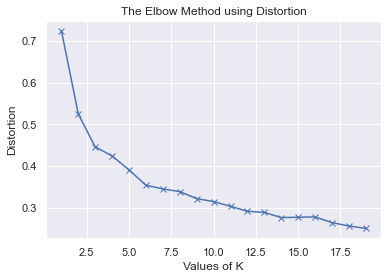

<Figure size 432x288 with 0 Axes>

In [15]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()
plt.savefig("Elbow_Method_Distortion.jpg", bbox_inches='tight')

In [16]:
# Inertia method
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 203.69157229208565
2 : 88.60675648892565
3 : 63.23724666246273
4 : 53.40732035260073
5 : 46.5225357208864
6 : 40.759814661780844
7 : 36.53781675114583
8 : 34.54658963518631
9 : 31.815459634660662
10 : 30.60853405646597
11 : 28.75312866858581
12 : 27.064871548352478
13 : 25.664392354249337
14 : 23.75253841937821
15 : 22.968115940660084
16 : 22.02378125595974
17 : 20.23517474776886
18 : 19.42160120176725
19 : 18.516451566174467


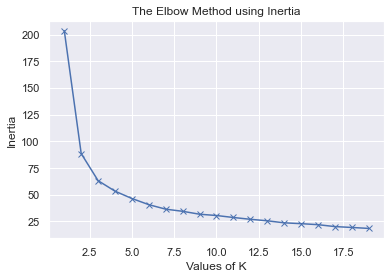

In [17]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()
#plt.savefig('Elbow_Method_Inertia.jpeg')  

#### Elbow method with Yellowbrick - visualizer

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

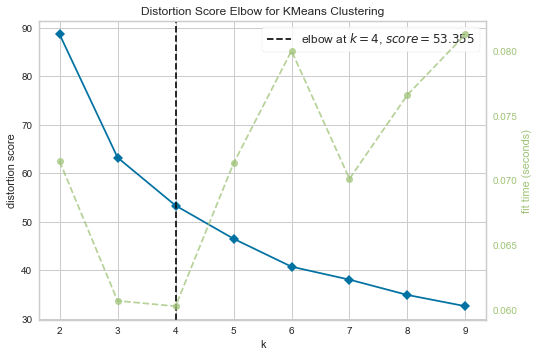

In [681]:
from yellowbrick.cluster import KElbowVisualizer

visualizer3 = KElbowVisualizer(KMeans(), k=(2,10))

visualizer3.fit(X) # Fit the data to the visualizer
visualizer3.show(outpath='Elbow_Method_Visualizer.png') 

#### Silhouette Method

##### Scratch

In [682]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

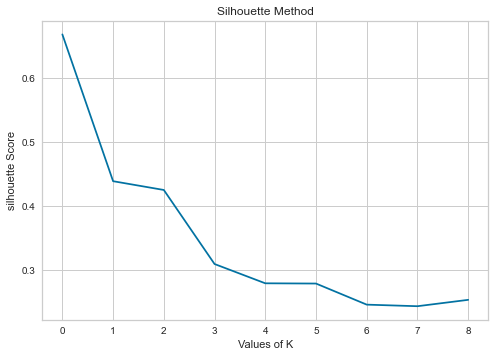

<Figure size 576x396 with 0 Axes>

In [684]:
plt.plot(sil)
plt.xlabel('Values of K')
plt.ylabel('silhouette Score')
plt.title('Silhouette Method' )
plt.show()
plt.savefig('Silhouette Method.jpeg')  

##### Silhouette method yellowbrick - visualizer

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 222 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

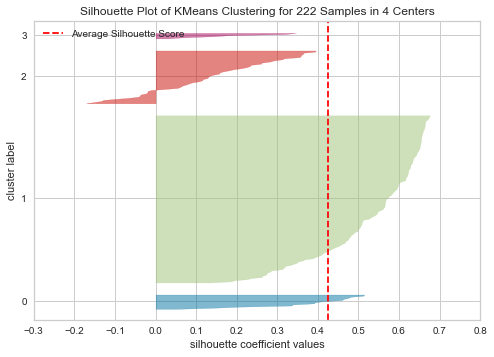

In [685]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model_K_5 = KMeans(n_clusters=4, random_state = 42)
visualizer_k_5 = SilhouetteVisualizer(model_K_5, colors = "yellowbrick")
visualizer_k_5.fit(X)
visualizer_k_5.show(outpath='Silhouette_Method_visualizer.png') 


In [686]:
model_K_5.n_clusters

4

Tras la validación con "Elbow method" y "Silhouette method", se determina que la cantidad óptima de clusters es 5.

#### K Means Modelling

In [687]:
k = 4

kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(X)

# Iterative procedure to learn labels  
labels_model = kmeans.predict(X)
centroids_model = kmeans.cluster_centers_
print(kmeans.inertia_)
print(kmeans.n_iter_)

53.354740241512104
6


In [694]:
output_model = pd.DataFrame(labels_model, columns = ["Cluster"]) 
print(output_model.shape)
output_model.value_counts()

(222, 1)


Cluster
0          153
3           49
1           14
2            6
dtype: int64

In [731]:
Plot_Kmeans_labels = output_model.value_counts().reset_index()
Plot_Kmeans_labels.rename(columns={0: 'Count'}, inplace=True)
Plot_Kmeans_labels

,Cluster,Count
0,0,153
1,3,49
2,1,14
3,2,6


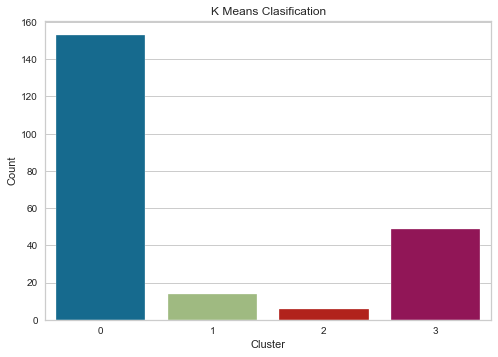

<Figure size 576x396 with 0 Axes>

In [732]:
sns.barplot(x = "Cluster", y = "Count", data = Plot_Kmeans_labels)
plt.title("K Means Clasification")
plt.show()
plt.savefig('K Means Clasification.jpeg')  

In [704]:
df_clustered_kmeans = sisben_2021_definitivo_grouped.reset_index().drop(["index"],axis=1)
print(df_clustered.shape)
df_clustered_kmeans["Cluster"] = output_model
df_clustered_kmeans["Cluster"].value_counts()

(222, 31)


0    153
3     49
1     14
2      6
Name: Cluster, dtype: int64

Export clusters result

In [737]:
df_clustered_kmeans.head(3)

,cod_barrio,nom_barrio,cod_mpio,cod_dpto,sexo_persona,nivel_sisben,edad_c,ind_fondo_pensiones_siv,tip_actividad_mes_siv,tip_empleado_siv,cod_vereda,ind_i_1,ind_i_2,ind_i_3,ind_i_4,ind_i_5,ind_i_6,ind_i_7,ind_i_8,ind_i_9,ind_i_10,ind_i_11,ind_i_12,ind_i_13,ind_i_14,ind_i_15,ind_h5,discapacidad_labenc,bdua_regimen_labenc,tipo_afiliado_labenc,Cluster
0,1.0,el paulon villa patricia,24208.0,24208356.0,543,546.0,10885.0,1318.0,1208.0,23300.0,0.0,222.0,33.0,45.0,92.0,57.0,7.0,41.0,301.0,46.0,8.0,122.0,156.0,53.0,44.0,93.0,96.0,348,218,718,0
1,2.0,el paulon villa lina,58276.0,58276857.0,1298,1397.0,26729.0,3001.0,2633.0,52678.0,0.0,579.0,101.0,73.0,179.0,135.0,0.0,60.0,719.0,113.0,27.0,281.0,321.0,107.0,277.0,366.0,290.0,848,570,1736,0
2,3.0,colorados,156128.0,156130296.0,3538,5069.0,76852.0,7820.0,7073.0,146726.0,0.0,1292.0,226.0,90.0,397.0,303.0,15.0,237.0,1632.0,238.0,79.0,138.0,85.0,13.0,19.0,533.0,305.0,2210,1087,4575,1


In [705]:
#df_KMeans = df_clustered[["cod_barrio","nom_barrio","Cluster"]]
#df_KMeans.to_csv("df_KMeans.csv", sep="~", index=False, encoding = "latin1")
df_clustered_kmeans.to_csv("df_clustered_kmeans_04072022.csv", sep="~", index=False, encoding = "latin1")

#### GMM Modelling

In [196]:
from sklearn import mixture

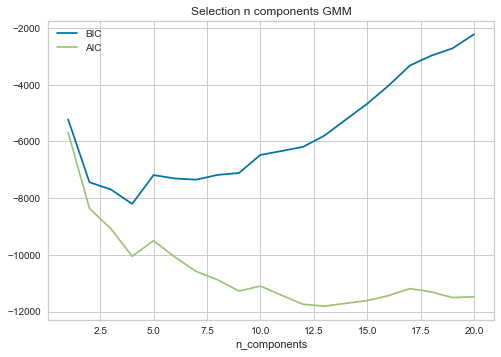

In [708]:
n_components = np.arange(1, 21)
models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
            for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('Selection n components GMM')
plt.xlabel('n_components');
plt.savefig('nComponents_GMM.jpeg')  

In [709]:
gmm = mixture.GaussianMixture(n_components=5).fit(X)
labels = gmm.predict(X)

In [710]:
GMM_labels = pd.DataFrame(labels, columns = ["Cluster"])



In [722]:
Plot_GMM_labels = GMM_labels.value_counts().reset_index()
Plot_GMM_labels.rename(columns={0: 'Count'}, inplace=True)
Plot_GMM_labels

,Cluster,Count
0,4,89
1,0,48
2,3,46
3,2,24
4,1,15


In [713]:
df_clustered_GMM = sisben_2021_definitivo_grouped.reset_index().drop(["index"],axis=1)
df_clustered_GMM["Cluster"] = GMM_labels
df_clustered_GMM.to_csv("df_clustered_GMM.csv", sep="~", index=False, encoding = "latin1")

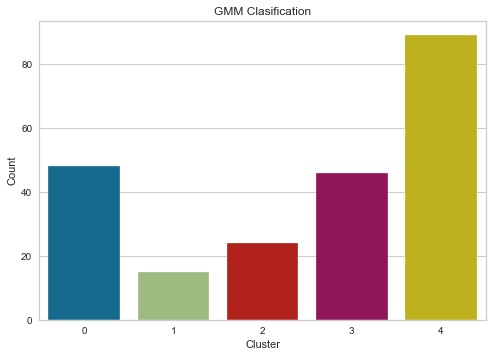

<Figure size 576x396 with 0 Axes>

In [728]:
sns.barplot(x = "Cluster", y = "Count", data = Plot_GMM_labels)
plt.title("GMM Clasification")
plt.show()
plt.savefig('GMM Clasification.jpeg')  

#### DBSCAN

In [236]:
X.shape


(223, 103)

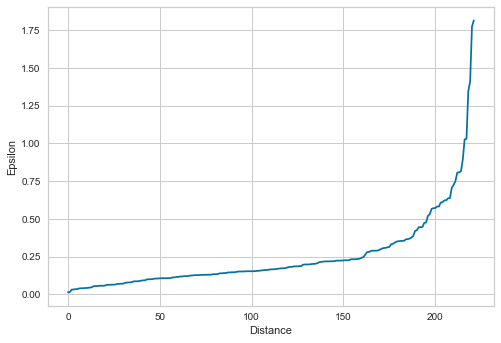

In [733]:
# we use nearestneighbors for calculating distance between points
from sklearn.neighbors import NearestNeighbors
# calculating distances
neigh=NearestNeighbors(n_neighbors=4)
distance=neigh.fit(X)
# indices and distance values
distances,indices=distance.kneighbors(X)
# Now sorting the distance increasing order
sorting_distances=np.sort(distances,axis=0)
# sorted distances
sorted_distances=sorting_distances[:,1]
# plot between distance vs epsilon
plt.plot(sorted_distances)
plt.xlabel("Distance")
plt.ylabel("Epsilon")
plt.show()

In [304]:
from sklearn.cluster import DBSCAN
minimo = round(223/6)
clustering = DBSCAN(eps = 0.5, min_samples = 3).fit(X)
DBSCAN_cluster = clustering.labels_


In [305]:
DBSCAN_labels = pd.DataFrame(DBSCAN_cluster, columns = ["Cluster"])

In [734]:
DBSCAN_labels.value_counts()

Cluster
-1         115
 0         108
dtype: int64

In [735]:
Plot_DBSCAN_labels = DBSCAN_labels.value_counts().reset_index()
Plot_DBSCAN_labels.rename(columns={0: 'Count'}, inplace=True)
Plot_DBSCAN_labels

,Cluster,Count
0,-1,115
1,0,108


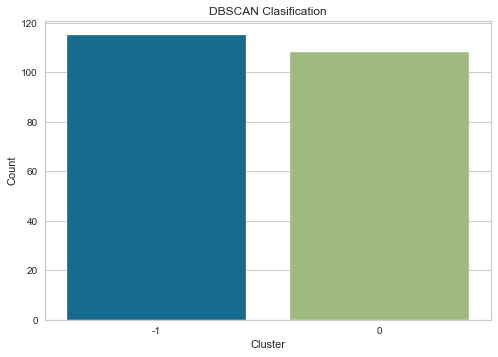

<Figure size 576x396 with 0 Axes>

In [736]:
sns.barplot(x = "Cluster", y = "Count", data = Plot_DBSCAN_labels)
plt.title("DBSCAN Clasification")
plt.show()
plt.savefig('DBSCAN Clasification.jpeg')  

# Sisben 2022

Please consider the previuos methodology, in this section the logic is the same

## Information review Sisben 2022

In [5]:
sisben_2022 = pd.read_csv("df_sisben_2022.csv", delimiter="~", encoding = 'latin1')

## Select target variables

In [7]:
sisben_2022.shape

(237741, 250)

In [9]:
pd.set_option('display.max_columns', None)
sisben_2022.head(3)

,documento,cod_dpto,Departamento,cod_mpio,Municipio,fec_paquete,num_paquete,num_ficha,ide_ficha_origen,ide_edificacion,ver_estructura,ori_encuesta,Cod_clase,Cod_centro_poblado,Cod_area_coordinacion,Cod_area_operativa,Cod_uni_cobertura,Cod_comuna_x,Cod_corregimiento,NOM_CORREGIMIENTO,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,Cod_enumerador,tot_viviendas,tot_hogares,ord_vivienda,ind_direccion,uso_vivienda,Ide_foto,fec_ini_encuesta,fec_fin_encuesta,Coord_x_manual_rec,Coord_y_manual_rec,Coord_x_auto_rec,Coord_y_auto_rec,Gps_Alt_auto_rec,Fec_captura_gps_rec,Gps_Distancia_rec,Coord_x_manual_enc,Coord_y_manual_enc,Coord_x_auto_enc,Coord_y_auto_enc,Gps_Alt_auto_enc,Fec_captura_gps_enc,Gps_Distancia_enc,Est_nov_cartografia,Cod_digitador,Fec_digitacion,ind_formato,Num_hogares_recuento,est_ficha,Cod_equipo_encuesta,Num_visita,Cod_Chip,Dir_Chip,Num_solicitud,Cod_UC_total,tip_vivienda,tip_mat_paredes,tip_mat_pisos,ind_tiene_energia,tip_estrato_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_estrato_acueducto,num_cuartos_vivienda,num_hogares_vivienda,cod_encuestador,cod_supervisor,cod_critico,fec_ini_vivienda,fec_fin_vivienda,ide_hogar,tip_ocupa_vivienda,num_cuartos_exclusivos,num_cuartos_dormir,num_cuartos_unicos_dormir,tip_sanitario,tip_ubi_sanitario,tip_uso_sanitario,tip_origen_agua,ind_agua_llega_7dias,num_dias_llega,ind_agua_llega_24horas,num_horas_llega,tip_uso_agua_beber,tip_elimina_basura,ind_tiene_cocina,tip_prepara_alimentos,tip_uso_cocina,tip_energia_cocina,ind_tiene_nevera,ind_tiene_lavadora,ind_tiene_pc,ind_tiene_internet,ind_tiene_moto,ind_tiene_tractor,ind_tiene_carro,ind_tiene_bien_raiz,ind_gasto_alimento,vlr_gasto_alimento,ind_gasto_transporte,vlr_gasto_transporte,ind_gasto_educacion,vlr_gasto_educacion,ind_gasto_salud,vlr_gasto_salud,ind_gasto_serv_publicos,vlr_gasto_serv_publicos,ind_gasto_celular,vlr_gasto_celular,ind_gasto_arriendo,vlr_gasto_arriendo,ind_gasto_otros,vlr_gasto_otros,vlr_total_gastos,num_habita_vivienda,ind_evento_inundacion,num_evento_inundacion,ind_evento_avalancha,num_evento_avalancha,ind_evento_terremoto,num_evento_terremoto,ind_evento_incendio,num_evento_incendio,ind_evento_vendaval,num_evento_vendaval,ind_evento_hundimiento,num_evento_hundimiento,num_personas_posibles,num_personas_hogar,fec_ini_visita1,fec_fin_visita1,res_visita1,fec_ini_visita2,fec_fin_visita2,res_visita2,ide_informante,Tip_informante,ide_firma_informante,Cau_sin_firma,Email_contacto,Ind_declaracion,ide_persona,ide_nacional,ind_escaner,sexo_persona,ori_persona,tip_documento,fec_nacimiento,edad_calculada,fec_documento,cod_dpto_documento,cod_mpio_documento,Cod_pais_documento,tip_parentesco,tip_estado_civil,ind_conyuge_vive_hogar,ide_conyuge,ind_padre_vive_hogar,ide_padre,ind_pariente_domestico,ide_serv_domestico,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,ind_acudio_salud,ind_fue_atendido_salud,ind_esta_embarazada,ind_tuvo_hijos,tip_cuidado_niños,ind_recibe_comida,ind_leer_escribir,ind_estudia,niv_educativo,grado_alcanzado,ind_fondo_pensiones,tip_actividad_mes,num_sem_buscando,tip_empleado,ind_ingr_salario,vlr_ingr_salario,ind_ingr_honorarios,vlr_ingr_honorarios,ind_ingr_cosecha,num_mes_ingr_cosecha,vlr_ingr_cosecha,ind_ingr_pension,vlr_ingr_pension,ind_ingr_remesa_pais,vlr_ingr_remesa_pais,ind_ingr_remesa_exterior,vlr_ingr_remesa_exterior,ind_ingr_arriendos,vlr_ingr_arriendos,ind_otros_ingresos,vlr_otros_ingresos,ind_ingr_estado,vlr_ingr_fam_accion,vlr_ingr_col_mayor,vlr_ingr_otro_subsidio,fec_ini_persona1,fec_fin_persona1,fec_ini_persona2,fec_fin_persona2,ide_Unigasto,Jefe_UG,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Grupo,Nivel,ide_Ug,persug,Capital,marca,estado,Linea_p,replicacion,fec_actualizacion_cns,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
0,1,68,SANTANDER,68001,BUCARAMANGA,2019-09-10 15:39:36.563,37,39567,"6,80011E+19",3,40018082017,1,

In [12]:
sisben_2022[["Cod_barrio","NOM_BARRIO"]].isnull().sum()

Cod_barrio    0
NOM_BARRIO    0
dtype: int64

In [24]:
print("Categorías por dpto: ", sisben_2022["cod_mpio"].unique())
print("Categorías por Municipio: ", sisben_2022["Municipio"].unique())


Categorías por dpto:  [68001]
Categorías por Municipio:  ['BUCARAMANGA']


In [ ]:
columns_2022 = list(sisben_2022.columns)
columns_2022

In [28]:
sisben_2022["Grupo"].unique()

array(['C', 'B', 'D', 'A', nan], dtype=object)

In [29]:
sisben_2022["Nivel"].unique()

array([ 7.,  2.,  3.,  5.,  4.,  1.,  6., 14.,  9., 11.,  8., 21., 10.,
       13., 15., 12., 20., 18., 17., 16., 19., nan])

In [34]:
sisben_2022["ind_tiene_acueducto"].unique()

array([1, 2], dtype=int64)

In [33]:
sisben_2022["tip_vivienda"].unique()

array([2, 1, 3, 4], dtype=int64)

In [35]:
sisben_2022["ind_tiene_energia"].unique()

array([1, 2], dtype=int64)

In [36]:
sisben_2022["tip_mat_pisos"].unique()

array([2, 3, 4, 5, 1, 6], dtype=int64)

In [37]:
sisben_2022["tip_ocupa_vivienda"].unique()

array([1, 3, 4, 2, 5], dtype=int64)

In [38]:
sisben_2022["tip_seg_social"].unique()

array([0, 1, 3, 9, 2], dtype=int64)

In [39]:
sisben_2022["ind_discap_ver"].unique()

array([2, 1], dtype=int64)

In [41]:
sisben_2022["ind_enfermo_30"].unique()

array([2, 1], dtype=int64)

In [42]:
sisben_2022["ind_ingr_salario"].unique()

array([99,  9,  1,  2], dtype=int64)

In [44]:
sisben_2022["vlr_ingr_salario"].describe()

count    2.377410e+05
mean     9.366736e+04
std      3.144325e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.200000e+07
Name: vlr_ingr_salario, dtype: float64

In [45]:
sisben_2022["Clasificacion"].unique()

array(['C07', 'B02', 'D03', 'A05', 'C04', 'C01', 'B03', 'C02', 'C06',
       'D07', 'C14', 'C09', 'C11', 'B07', 'B05', 'C03', 'C08', 'D21',
       'B06', 'D02', 'B04', 'D04', 'C05', 'A04', 'B01', 'C10', 'C13',
       'C15', 'A02', 'C12', 'D11', 'D09', 'A03', 'D20', 'C18', 'D01',
       'C17', 'C16', 'D10', 'A01', 'D17', 'D05', 'D06', 'D12', 'D08',
       'D19', 'D13', 'D14', 'D15', 'D16', nan, 'D18'], dtype=object)

In [ ]:
sisben_2022["C"].unique()

In [ ]:
sisben_2022[["Latitud","Longitud"]]

## Pre-processing sisben 2022

In [15]:
variables_objetivo_2022 = pd.read_csv("variables_objetivo_sisben_2022.csv")


In [16]:
variables_objetivo_2022 = variables_objetivo_2022["variables"].tolist()


In [ ]:
variables_objetivo_2022

In [18]:
sisben_2022_obj = sisben_2022[variables_objetivo_2022]

In [20]:
sisben_2022_obj.shape

(237741, 74)

In [25]:
pd.set_option('display.max_columns', None)
sisben_2022_obj.head(4)

,cod_dpto,Departamento,cod_mpio,Municipio,Cod_vereda,NOM_VEREDA,Cod_barrio,NOM_BARRIO,uso_vivienda,tip_vivienda,tip_mat_pisos,ind_tiene_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_sanitario,tip_origen_agua,ind_tiene_cocina,vlr_total_gastos,ind_evento_inundacion,ind_evento_avalancha,ind_evento_terremoto,ind_evento_incendio,ind_evento_vendaval,ind_evento_hundimiento,sexo_persona,edad_calculada,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,niv_educativo,ind_fondo_pensiones,tip_empleado,ind_ingr_salario,ind_ingr_honorarios,ind_ingr_cosecha,ind_ingr_pension,ind_ingr_remesa_pais,ind_ingr_remesa_exterior,ind_ingr_arriendos,ind_otros_ingresos,ind_ingr_estado,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Grupo,Nivel,C,Clasificacion,Latitud,Longitud,BARRIO,COMUNA
0,68,SANTANDER,68001,BUCARAMANGA,0,SIN VEREDA,145,CAMPO HERMOSO,1,2,2,1,1,1,1,1,1,1,1,650000,2,2,2,2,2,2,2,5,2,2,2,2,2,2,2,1,0,2,1,9,99,99,99,99,99,99,99,99,99,99,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,C,7.0,3.75,C07,7.106287,-73.139366,CAMPO HERMOSO,05. GARCIA ROVIRA
1,68,SANTANDER,68001,BUCARAMANGA,0,SIN VEREDA,114,BUENOS AIRES,1,2,3,1,1,1,1,1,1,1,1,1050000,2,2,2,2,2,2,2,5,2,2,2,2,2,2,2,1,0,2,0,9,99,99,99,99,99,99,99,99,99,99,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,B,2.0,6.00,B02,7.131871,-73.099892,BUENOS AIRES,14. MORRORICO
2,68,SANTANDER,68001,BUCARAMANGA,0,SIN VEREDA,193,NUEVA GRANADA,1,1,2,1,1,1,1,1,1,1,1,613600,2,2,2,2,2,2,1,91,2,2,2,2,2,2,2,1,1,2,0,2,99,9,9,9,2,2,2,2,2,2,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,D,3.0,6.00,D03,7.098105,-73.113694,NUEVA GRANADA,09. LA PEDREGOSA
3,68,SANTANDER,68001,BUCARAMANGA,0,SIN VEREDA,142,ALFONSO LÓPEZ,1,1,3,1,1,1,1,1,1,1,1,320000,2,2,2,2,2,2,1,87,1,2,1,2,2,1,2,2,3,2,2,2,5,99,1,99,2,1,2,2,2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,C,7.0,3.00,C07,7.112876,-73.131669,ALFONSO LOPEZ,05. GARCIA ROVIRA


In [53]:
columnas_perdidas_2022 = sisben_2022_obj.loc[:].isna().sum(axis=0)
columnas_perdidas_2022.sort_values(ascending=False).head(10)


Latitud                 12461
Clasificacion              24
Nivel                      24
Grupo                      24
COMUNA                      2
ind_ingr_remesa_pais        0
I1                          0
H_5                         0
ind_ingr_estado             0
ind_otros_ingresos          0
dtype: int64

In [54]:
filas_perdidas_2022 = sisben_2022_obj.loc[:].isna().sum(axis=1)
filas_perdidas_2022.sort_values(ascending=False).head(10)

125412    3
224055    3
174765    3
181900    3
109324    3
119280    3
231565    3
125445    3
224115    3
131691    3
dtype: int64

In [60]:
print(filas_perdidas_2022.value_counts().sort_values(ascending=True))
print("")
print(" Filas con 1 NA: ", (12463/237741)*100 )
print(" Filas con 3 NA: ", (24/237741)*100 )


3        24
1     12463
0    225254
dtype: int64

 Filas con 1 NA:  5.242259433585288
 Filas con 3 NA:  0.010095019369818416


In [61]:
sisben_2022_obj_depurado = sisben_2022_obj.drop(["Clasificacion", "Nivel", "Grupo"], axis=1)

In [ ]:
pd.set_option('display.max_columns', None)
sisben_2022_obj_depurado.head(5)

In [65]:
sisben_2022_obj_depurado.columns

Index(['cod_dpto', 'Departamento', 'cod_mpio', 'Municipio', 'Cod_vereda',
       'NOM_VEREDA', 'Cod_barrio', 'NOM_BARRIO', 'uso_vivienda',
       'tip_vivienda', 'tip_mat_pisos', 'ind_tiene_energia',
       'ind_tiene_alcantarillado', 'ind_tiene_gas', 'ind_tiene_recoleccion',
       'ind_tiene_acueducto', 'tip_sanitario', 'tip_origen_agua',
       'ind_tiene_cocina', 'vlr_total_gastos', 'ind_evento_inundacion',
       'ind_evento_avalancha', 'ind_evento_terremoto', 'ind_evento_incendio',
       'ind_evento_vendaval', 'ind_evento_hundimiento', 'sexo_persona',
       'edad_calculada', 'ind_discap_ver', 'ind_discap_oir',
       'ind_discap_hablar', 'ind_discap_moverse', 'ind_discap_bañarse',
       'ind_discap_salir', 'ind_discap_entender', 'ind_discap_ninguna',
       'tip_seg_social', 'ind_enfermo_30', 'niv_educativo',
       'ind_fondo_pensiones', 'tip_empleado', 'ind_ingr_salario',
       'ind_ingr_honorarios', 'ind_ingr_cosecha', 'ind_ingr_pension',
       'ind_ingr_remesa_pais', 'in

In [73]:
sisben_2022_obj_depurado.to_csv("sisben_2022_obj_depurado.csv", sep="~", index=False, encoding = "latin1")

Revision and label encoder

In [67]:
def calidad_dato_2022(columna):
    print("Valores NA: ", sisben_2022_obj_depurado[columna].isnull().sum())
    x = sisben_2022_obj_depurado[columna].value_counts()
    return x

In [68]:
def label_enc(columna):
    x = LabelEncoder().fit_transform(sisben_2022_obj_depurado[columna])
    return x

Correlation analysis

In [72]:
variables_corr_2022 = sisben_2022_obj_depurado.drop(['cod_dpto', 'Departamento', 'cod_mpio', 'Municipio', 'Cod_vereda',
       'NOM_VEREDA', 'Cod_barrio', 'NOM_BARRIO'],axis=1)
sisben_2022_corr = variables_corr_2022.corr()

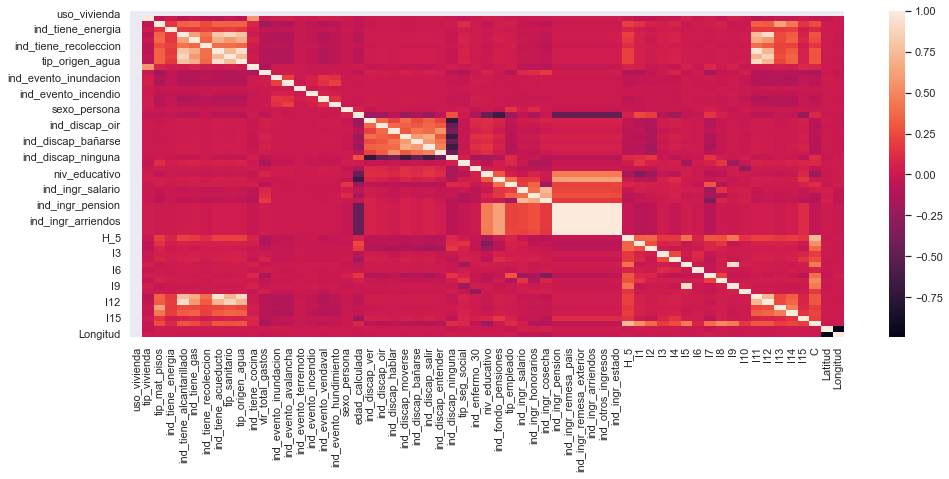

In [74]:
plt.figure(figsize=(16, 6))
sns.heatmap(sisben_2022_corr);

In [76]:
variables_objetivo_2022_dep = pd.read_csv("variables_objetivo_sisben_2022_dep.csv")
variables_objetivo_2022_dep = variables_objetivo_2022_dep["variables"].tolist()
sisben_2022_definitivo = sisben_2022[variables_objetivo_2022_dep]



In [81]:
sisben_2022_definitivo.columns

Index(['cod_dpto', 'Departamento', 'cod_mpio', 'Municipio', 'Cod_vereda',
       'NOM_VEREDA', 'Cod_barrio', 'NOM_BARRIO', 'uso_vivienda',
       'tip_vivienda', 'tip_mat_pisos', 'ind_tiene_energia',
       'ind_tiene_alcantarillado', 'ind_tiene_gas', 'ind_tiene_recoleccion',
       'ind_tiene_acueducto', 'tip_origen_agua', 'ind_tiene_cocina',
       'vlr_total_gastos', 'ind_evento_inundacion', 'ind_evento_avalancha',
       'ind_evento_terremoto', 'ind_evento_incendio', 'ind_evento_vendaval',
       'ind_evento_hundimiento', 'sexo_persona', 'edad_calculada',
       'ind_discap_ver', 'ind_discap_oir', 'ind_discap_hablar',
       'ind_discap_moverse', 'ind_discap_bañarse', 'ind_discap_salir',
       'ind_discap_entender', 'ind_discap_ninguna', 'tip_seg_social',
       'ind_enfermo_30', 'niv_educativo', 'ind_fondo_pensiones',
       'tip_empleado', 'ind_ingr_salario', 'ind_ingr_pension',
       'ind_ingr_remesa_pais', 'ind_ingr_remesa_exterior',
       'ind_ingr_arriendos', 'ind_ingr_est

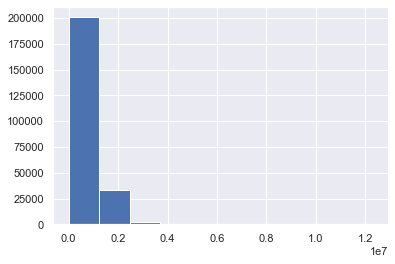

In [79]:
plt.hist(sisben_2022_definitivo["vlr_total_gastos"])
plt.show()

Exportar sisben 2022 Definitivo

In [83]:
sisben_2022_definitivo.to_csv("sisben_2022_definitivo.csv", sep="~", index=False, encoding = "latin1")

## One hot encoding and feature selection

In [ ]:
sisben_2022_definitivo.columns

categorical variables

In [107]:
sisben_2022_definitivo_cat =sisben_2022_definitivo.drop(['cod_dpto', 'Departamento', 'cod_mpio',
 'Municipio', 'Cod_vereda', 'NOM_VEREDA', 'vlr_total_gastos','Grupo', 
 'Nivel', 'C', 'Clasificacion', 'Latitud', 'Longitud', 'BARRIO','COMUNA'],axis=1) 


In [ ]:
sisben_2022_definitivo_cat.isna().sum().sort_values(ascending=False).head(5)

In [ ]:
sisben_2022_definitivo_cat.columns

In [109]:
sisben_2022_premodel_cat = pd.get_dummies(sisben_2022_definitivo_cat, columns = ['uso_vivienda',
       'tip_vivienda', 'tip_mat_pisos', 'ind_tiene_energia',
       'ind_tiene_alcantarillado', 'ind_tiene_gas', 'ind_tiene_recoleccion',
       'ind_tiene_acueducto', 'tip_origen_agua', 'ind_tiene_cocina',
       'ind_evento_inundacion', 'ind_evento_avalancha', 'ind_evento_terremoto',
       'ind_evento_incendio', 'ind_evento_vendaval', 'ind_evento_hundimiento',
       'sexo_persona', 'edad_calculada', 'ind_discap_ver', 'ind_discap_oir',
       'ind_discap_hablar', 'ind_discap_moverse', 'ind_discap_bañarse',
       'ind_discap_salir', 'ind_discap_entender', 'ind_discap_ninguna',
       'tip_seg_social', 'ind_enfermo_30', 'niv_educativo',
       'ind_fondo_pensiones', 'tip_empleado', 'ind_ingr_salario',
       'ind_ingr_pension', 'ind_ingr_remesa_pais', 'ind_ingr_remesa_exterior',
       'ind_ingr_arriendos', 'ind_ingr_estado', 'H_5', 'I1', 'I2', 'I3', 'I4',
       'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12', 'I13', 'I14', 'I15']) # Variable dummy para categóricas

In [110]:
pd.set_option('display.max_columns', None)
sisben_2022_premodel_cat.head(5)

,Cod_barrio,NOM_BARRIO,uso_vivienda_1,tip_vivienda_1,tip_vivienda_2,tip_vivienda_3,tip_vivienda_4,tip_mat_pisos_1,tip_mat_pisos_2,tip_mat_pisos_3,tip_mat_pisos_4,tip_mat_pisos_5,tip_mat_pisos_6,ind_tiene_energia_1,ind_tiene_energia_2,ind_tiene_alcantarillado_1,ind_tiene_alcantarillado_2,ind_tiene_gas_1,ind_tiene_gas_2,ind_tiene_recoleccion_1,ind_tiene_recoleccion_2,ind_tiene_acueducto_1,ind_tiene_acueducto_2,tip_origen_agua_1,tip_origen_agua_2,tip_origen_agua_3,tip_origen_agua_4,tip_origen_agua_5,tip_origen_agua_6,tip_origen_agua_7,tip_origen_agua_8,tip_origen_agua_9,ind_tiene_cocina_1,ind_tiene_cocina_2,ind_evento_inundacion_1,ind_evento_inundacion_2,ind_evento_avalancha_1,ind_evento_avalancha_2,ind_evento_terremoto_1,ind_evento_terremoto_2,ind_evento_incendio_1,ind_evento_incendio_2,ind_evento_vendaval_1,ind_evento_vendaval_2,ind_evento_hundimiento_1,ind_evento_hundimiento_2,sexo_persona_1,sexo_persona_2,edad_calculada_0,edad_calculada_1,edad_calculada_2,edad_calculada_3,edad_calculada_4,edad_calculada_5,edad_calculada_6,edad_calculada_7,edad_calculada_8,edad_calculada_9,edad_calculada_10,edad_calculada_11,edad_calculada_12,edad_calculada_13,edad_calculada_14,edad_calculada_15,edad_calculada_16,edad_calculada_17,edad_calculada_18,edad_calculada_19,edad_calculada_20,edad_calculada_21,edad_calculada_22,edad_calculada_23,edad_calculada_24,edad_calculada_25,edad_calculada_26,edad_calculada_27,edad_calculada_28,edad_calculada_29,edad_calculada_30,edad_calculada_31,edad_calculada_32,edad_calculada_33,edad_calculada_34,edad_calculada_35,edad_calculada_36,edad_calculada_37,edad_calculada_38,edad_calculada_39,edad_calculada_40,edad_calculada_41,edad_calculada_42,edad_calculada_43,edad_calculada_44,edad_calculada_45,edad_calculada_46,edad_calculada_47,edad_calculada_48,edad_calculada_49,edad_calculada_50,edad_calculada_51,edad_calculada_52,edad_calculada_53,edad_calculada_54,edad_calculada_55,edad_calculada_56,edad_calculada_57,edad_calculada_58,edad_calculada_59,edad_calculada_60,edad_calculada_61,edad_calculada_62,edad_calculada_63,edad_calculada_64,edad_calculada_65,edad_calculada_66,edad_calculada_67,edad_calculada_68,edad_calculada_69,edad_calculada_70,edad_calculada_71,edad_calculada_72,edad_calculada_73,edad_calculada_74,edad_calculada_75,edad_calculada_76,edad_calculada_77,edad_calculada_78,edad_calculada_79,edad_calculada_80,edad_calculada_81,edad_calculada_82,edad_calculada_83,edad_calculada_84,edad_calculada_85,edad_calculada_86,edad_calculada_87,edad_calculada_88,edad_calculada_89,edad_calculada_90,edad_calculada_91,edad_calculada_92,edad_calculada_93,edad_calculada_94,edad_calculada_95,edad_calculada_96,edad_calculada_97,edad_calculada_98,edad_calculada_99,edad_calculada_100,edad_calculada_101,edad_calculada_102,edad_calculada_103,edad_calculada_113,edad_calculada_127,ind_discap_ver_1,ind_discap_ver_2,ind_discap_oir_1,ind_discap_oir_2,ind_discap_hablar_1,ind_discap_hablar_2,ind_discap_moverse_1,ind_discap_moverse_2,ind_discap_bañarse_1,ind_discap_bañarse_2,ind_discap_salir_1,ind_discap_salir_2,ind_discap_entender_1,ind_discap_entender_2,ind_discap_ninguna_1,ind_discap_ninguna_2,tip_seg_social_0,tip_seg_social_1,tip_seg_social_2,tip_seg_social_3,tip_seg_social_9,ind_enfermo_30_1,ind_enfermo_30_2,niv_educativo_0,niv_educativo_1,niv_educativo_2,niv_educativo_3,niv_educativo_4,niv_educativo_5,niv_educativo_6,niv_educativo_7,niv_educativo_9,ind_fondo_pensiones_1,ind_fondo_pensiones_2,ind_fondo_pensiones_3,ind_fondo_pensiones_9,tip_empleado_1,tip_empleado_2,tip_empleado_3,tip_empleado_4,tip_empleado_5,tip_empleado_6,tip_empleado_7,tip_empleado_8,tip_empleado_9,tip_empleado_10,tip_empleado_99,ind_ingr_salario_1,ind_ingr_salario_2,ind_ingr_salario_9,ind_ingr_salario_99,ind_ingr_pension_1,ind_ingr_pension_2,ind_ingr_pension_9,ind_ingr_pension_99,ind_ingr_remesa_pais_1,ind_ingr_remesa_pais_2,ind_ingr_remesa_pais_9,ind_ingr_remesa_pais_99,ind_ingr_remesa_exterior_1,ind_ingr_remesa_exterior_2,ind_ingr_remesa_exterior_9,ind_ingr_remes

In [111]:
sisben_2022_model = sisben_2022_premodel_cat


## Modelling Sisben 2022

In [117]:
df_grouped = sisben_2022_model.groupby(["Cod_barrio","NOM_BARRIO"]).sum().reset_index()

In [119]:
df_grouped = df_grouped.drop(["Cod_barrio","NOM_BARRIO"],axis=1)
df_grouped

,uso_vivienda_1,tip_vivienda_1,tip_vivienda_2,tip_vivienda_3,tip_vivienda_4,tip_mat_pisos_1,tip_mat_pisos_2,tip_mat_pisos_3,tip_mat_pisos_4,tip_mat_pisos_5,tip_mat_pisos_6,ind_tiene_energia_1,ind_tiene_energia_2,ind_tiene_alcantarillado_1,ind_tiene_alcantarillado_2,ind_tiene_gas_1,ind_tiene_gas_2,ind_tiene_recoleccion_1,ind_tiene_recoleccion_2,ind_tiene_acueducto_1,ind_tiene_acueducto_2,tip_origen_agua_1,tip_origen_agua_2,tip_origen_agua_3,tip_origen_agua_4,tip_origen_agua_5,tip_origen_agua_6,tip_origen_agua_7,tip_origen_agua_8,tip_origen_agua_9,ind_tiene_cocina_1,ind_tiene_cocina_2,ind_evento_inundacion_1,ind_evento_inundacion_2,ind_evento_avalancha_1,ind_evento_avalancha_2,ind_evento_terremoto_1,ind_evento_terremoto_2,ind_evento_incendio_1,ind_evento_incendio_2,ind_evento_vendaval_1,ind_evento_vendaval_2,ind_evento_hundimiento_1,ind_evento_hundimiento_2,sexo_persona_1,sexo_persona_2,edad_calculada_0,edad_calculada_1,edad_calculada_2,edad_calculada_3,edad_calculada_4,edad_calculada_5,edad_calculada_6,edad_calculada_7,edad_calculada_8,edad_calculada_9,edad_calculada_10,edad_calculada_11,edad_calculada_12,edad_calculada_13,edad_calculada_14,edad_calculada_15,edad_calculada_16,edad_calculada_17,edad_calculada_18,edad_calculada_19,edad_calculada_20,edad_calculada_21,edad_calculada_22,edad_calculada_23,edad_calculada_24,edad_calculada_25,edad_calculada_26,edad_calculada_27,edad_calculada_28,edad_calculada_29,edad_calculada_30,edad_calculada_31,edad_calculada_32,edad_calculada_33,edad_calculada_34,edad_calculada_35,edad_calculada_36,edad_calculada_37,edad_calculada_38,edad_calculada_39,edad_calculada_40,edad_calculada_41,edad_calculada_42,edad_calculada_43,edad_calculada_44,edad_calculada_45,edad_calculada_46,edad_calculada_47,edad_calculada_48,edad_calculada_49,edad_calculada_50,edad_calculada_51,edad_calculada_52,edad_calculada_53,edad_calculada_54,edad_calculada_55,edad_calculada_56,edad_calculada_57,edad_calculada_58,edad_calculada_59,edad_calculada_60,edad_calculada_61,edad_calculada_62,edad_calculada_63,edad_calculada_64,edad_calculada_65,edad_calculada_66,edad_calculada_67,edad_calculada_68,edad_calculada_69,edad_calculada_70,edad_calculada_71,edad_calculada_72,edad_calculada_73,edad_calculada_74,edad_calculada_75,edad_calculada_76,edad_calculada_77,edad_calculada_78,edad_calculada_79,edad_calculada_80,edad_calculada_81,edad_calculada_82,edad_calculada_83,edad_calculada_84,edad_calculada_85,edad_calculada_86,edad_calculada_87,edad_calculada_88,edad_calculada_89,edad_calculada_90,edad_calculada_91,edad_calculada_92,edad_calculada_93,edad_calculada_94,edad_calculada_95,edad_calculada_96,edad_calculada_97,edad_calculada_98,edad_calculada_99,edad_calculada_100,edad_calculada_101,edad_calculada_102,edad_calculada_103,edad_calculada_113,edad_calculada_127,ind_discap_ver_1,ind_discap_ver_2,ind_discap_oir_1,ind_discap_oir_2,ind_discap_hablar_1,ind_discap_hablar_2,ind_discap_moverse_1,ind_discap_moverse_2,ind_discap_bañarse_1,ind_discap_bañarse_2,ind_discap_salir_1,ind_discap_salir_2,ind_discap_entender_1,ind_discap_entender_2,ind_discap_ninguna_1,ind_discap_ninguna_2,tip_seg_social_0,tip_seg_social_1,tip_seg_social_2,tip_seg_social_3,tip_seg_social_9,ind_enfermo_30_1,ind_enfermo_30_2,niv_educativo_0,niv_educativo_1,niv_educativo_2,niv_educativo_3,niv_educativo_4,niv_educativo_5,niv_educativo_6,niv_educativo_7,niv_educativo_9,ind_fondo_pensiones_1,ind_fondo_pensiones_2,ind_fondo_pensiones_3,ind_fondo_pensiones_9,tip_empleado_1,tip_empleado_2,tip_empleado_3,tip_empleado_4,tip_empleado_5,tip_empleado_6,tip_empleado_7,tip_empleado_8,tip_empleado_9,tip_empleado_10,tip_empleado_99,ind_ingr_salario_1,ind_ingr_salario_2,ind_ingr_salario_9,ind_ingr_salario_99,ind_ingr_pension_1,ind_ingr_pension_2,ind_ingr_pension_9,ind_ingr_pension_99,ind_ingr_remesa_pais_1,ind_ingr_remesa_pais_2,ind_ingr_remesa_pais_9,ind_ingr_remesa_pais_99,ind_ingr_remesa_exterior_1,ind_ingr_remesa_exterior_2,ind_ingr_remesa_exterior_9,ind_ingr_remesa_exterior_99,ind_ingr

In [122]:
def agrupar_datos(df):

    df_grouped = df.groupby(["Cod_barrio","NOM_BARRIO"]).sum().reset_index()
    df_grouped = df_grouped.drop(["Cod_barrio","NOM_BARRIO"],axis=1)
    df_grouped = df_grouped.astype("float")
    
    return df_grouped

from sklearn import preprocessing

def normalizar(df):
    scaler = preprocessing.MinMaxScaler()
    minmax_df = scaler.fit_transform(df)
    minmax_df = pd.DataFrame(minmax_df)

    return minmax_df


from sklearn.decomposition import PCA

def componentes_principales(df_norm):
    pca = PCA(.99)
    pca.fit(df_norm)
    data = pca.transform(df_norm)
    data_components = pd.DataFrame(data)
    
    return data_components


In [123]:
sisben_2022_definitivo_grouped = agrupar_datos(sisben_2022_model)


In [125]:
minmax_df = normalizar(sisben_2022_definitivo_grouped)


In [126]:
data_components = pca(minmax_df)

### Elbow Method

In [130]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [136]:
K = range(1, 20)

def scratch_elbowM(X,K):

	distortions = []
	inertias = []
	mapping1 = {}
	mapping2 = {}
	

	for k in K:
		# Building and fitting the model
		kmeanModel = KMeans(n_clusters=k).fit(X)
		kmeanModel.fit(X)

		distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / X.shape[0])
		inertias.append(kmeanModel.inertia_)

		mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / X.shape[0]
		mapping2[k] = kmeanModel.inertia_

	return distortions,inertias,mapping1,mapping2

def plot_distortion(K,distortions):
	plt.plot(K, distortions, 'bx-')
	plt.xlabel('Values of K')
	plt.ylabel('Distortion')
	plt.title('The Elbow Method using Distortion')
	plt.show()
	plt.savefig('Elbow_Method_Distortion_2022.jpeg')

def plot_inertia(K,inertias):
	plt.plot(K, inertias, 'bx-')
	plt.xlabel('Values of K')
	plt.ylabel('Inertia')
	plt.title('The Elbow Method using Inertia')
	plt.show()
	plt.savefig('Elbow_Method_Inertia_2022.jpeg') 


In [142]:
K = range(2, 20)

sisben_2022_kemans = scratch_elbowM(data_components,K)

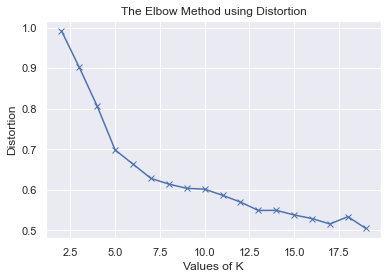

<Figure size 432x288 with 0 Axes>

In [143]:
plot_distortion(K, sisben_2022_kemans[0])

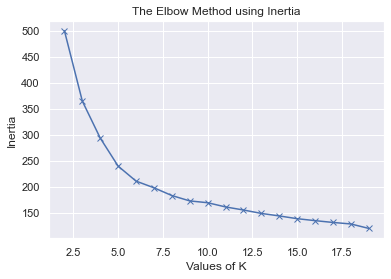

<Figure size 432x288 with 0 Axes>

In [144]:
plot_inertia(K, sisben_2022_kemans[1])

In [155]:
from yellowbrick.cluster import KElbowVisualizer

def elbow_visualizaer(X,k):

    visualizer3 = KElbowVisualizer(KMeans(), k=(1,20))

    visualizer3.fit(X) # Fit the data to the visualizer
    visualizer3.show(outpath='Elbow_Method_Visualize_2022.png') 

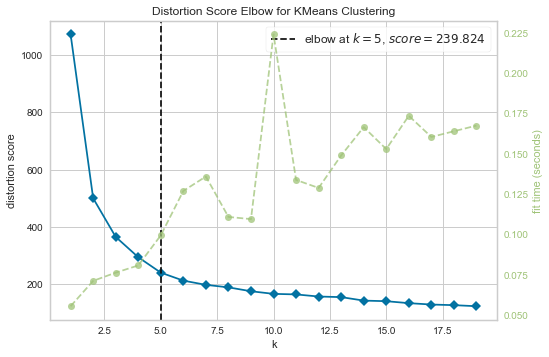

In [156]:
elbow_visualizaer(data_components,K)

### Silhouette Mehotd

In [158]:
from sklearn.metrics import silhouette_score

kmax = 20

def scratch_silhouette(X,kmax):
  sil = []
  # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
  for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
  
  return sil

def plot_silhouette(sil):
  plt.plot(sil)
  plt.xlabel('Values of K')
  plt.ylabel('silhouette Score')
  plt.title('Silhouette Method' )
  plt.show()
  plt.savefig('Silhouette Method_2022.jpeg') 



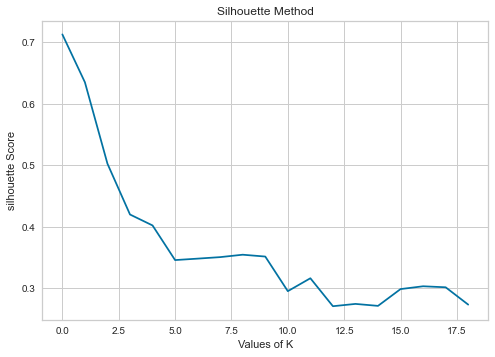

<Figure size 576x396 with 0 Axes>

In [159]:
sil = scratch_silhouette(data_components,kmax)
plot_silhouette(sil)

In [160]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

n_clusters = 5

def silhouette_visualizer(X, n_clusters):

    model_K_5 = KMeans(n_clusters, random_state = 42)
    visualizer_k_5 = SilhouetteVisualizer(model_K_5, colors = "yellowbrick")
    visualizer_k_5.fit(X)
    visualizer_k_5.show(outpath='Silhouette_Method_visualizer_2022.png') 

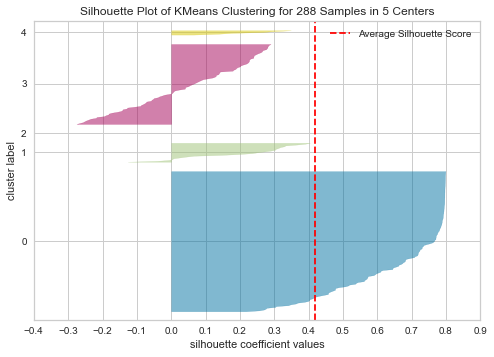

In [165]:
silhouette_visualizer(data_components, n_clusters)

### K Means Model

In [169]:
def kmeans_2022(X,n_clusters):

    kmeans = KMeans(n_clusters, init='k-means++')
    kmeans.fit(X)

    # Iterative procedure to learn labels  
    labels_model = kmeans.predict(X)
    centroids_model = kmeans.cluster_centers_

    print("Inertia: ", kmeans.inertia_)
    print("No. Iteraciones: ", kmeans.n_iter_)

    return labels_model, centroids_model

    

In [170]:
sisben_2022_kmeans = kmeans_2022(data_components,n_clusters )



Inertia:  239.9160437727984
No. Iteraciones:  7


In [176]:
output_model_2022 = sisben_2022_kmeans[0]

In [25]:

def final_clusters(labels_model):

    output_model = pd.DataFrame(labels_model, columns = ["Cluster"]) 
    print(output_model.shape)
    print(output_model.value_counts())

    Plot_Kmeans_labels = output_model.value_counts().reset_index()
    Plot_Kmeans_labels.rename(columns={0: 'Count'}, inplace=True)
    Plot_Kmeans_labels  

    sns.barplot(x = "Cluster", y = "Count", data = Plot_Kmeans_labels)
    plt.title("GMM Clasification")
    plt.show()
    plt.savefig('GMM Clasification_2022.jpeg') 

    return Plot_Kmeans_labels



(288, 1)
Cluster
3          161
0           93
2           27
1            6
4            1
dtype: int64


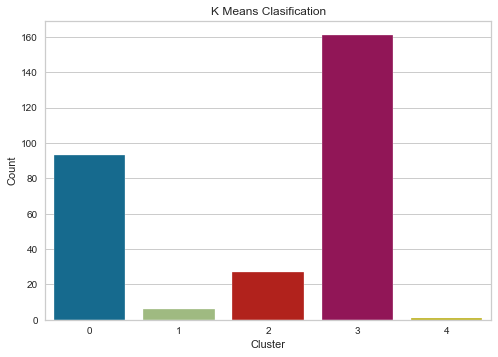

,Cluster,Count
0,3,161
1,0,93
2,2,27
3,1,6
4,4,1


<Figure size 576x396 with 0 Axes>

In [178]:
final_clusters(output_model_2022)

In [243]:
sisben_2022_grouped= sisben_2022_definitivo.groupby(["Cod_barrio","NOM_BARRIO"]).sum().reset_index()

In [181]:
sisben_2022_grouped["Cluster"] = output_model_2022
df_clustered_kmeans_2022 = sisben_2022_grouped

In [ ]:
df_clustered_kmeans_2022.columns

In [186]:
df_clustered_kmeans_2022 = df_clustered_kmeans_2022.drop(['cod_dpto', 'cod_mpio', 'Cod_vereda','Latitud', 'Longitud'],axis=1)

In [187]:
df_clustered_kmeans_2022

,Cod_barrio,NOM_BARRIO,uso_vivienda,tip_vivienda,tip_mat_pisos,ind_tiene_energia,ind_tiene_alcantarillado,ind_tiene_gas,ind_tiene_recoleccion,ind_tiene_acueducto,tip_origen_agua,ind_tiene_cocina,vlr_total_gastos,ind_evento_inundacion,ind_evento_avalancha,ind_evento_terremoto,ind_evento_incendio,ind_evento_vendaval,ind_evento_hundimiento,sexo_persona,edad_calculada,ind_discap_ver,ind_discap_oir,ind_discap_hablar,ind_discap_moverse,ind_discap_bañarse,ind_discap_salir,ind_discap_entender,ind_discap_ninguna,tip_seg_social,ind_enfermo_30,niv_educativo,ind_fondo_pensiones,tip_empleado,ind_ingr_salario,ind_ingr_pension,ind_ingr_remesa_pais,ind_ingr_remesa_exterior,ind_ingr_arriendos,ind_ingr_estado,H_5,I1,I2,I3,I4,I5,I6,I7,I8,I9,I10,I11,I12,I13,I14,I15,Nivel,C,Cluster
0,0,BARRIO_S4,10441,12368,30359,10596,19954,17850,15251,20459,52856,10802,5906881017,20704,20240,20856,20862,20310,20694,15640,338838,20484,20782,20817,20626,20781,20612,20781,11176,25966,20196,33725,37021,846171,565470,104629,104641,104653,104703,105534,3645,7029,1203,488,2565,2371,26,3252,6698,2104,303,7511,4038,1016,266,1918,47766.0,43820.40,4
1,1,EL PAULON VILLA PATRICIA,421,560,1235,436,607,540,485,568,1332,466,281317100,822,823,842,842,811,828,637,12283,824,834,837,822,833,826,837,454,986,819,1453,1610,30583,26505,6054,6043,6054,6053,6153,124,261,41,44,126,88,0,72,316,69,5,147,186,59,52,152,1705.0,1697.10,3
2,2,EL PAULON VILLA LINA,965,1326,2973,988,1355,1371,1095,1302,2906,1025,619369600,1917,1885,1930,1924,1909,1910,1456,28867,1900,1910,1916,1891,1916,1899,1918,1030,2667,1874,3266,3537,67481,63753,12892,12885,12893,12893,13077,344,642,113,89,211,164,0,158,770,151,26,337,390,143,320,435,3972.0,4113.00,0
3,3,COLORADOS,2846,4038,6870,2854,3000,3205,2912,3116,4279,2925,2171334976,5672,5682,5692,5683,5645,5663,4395,90086,5562,5625,5646,5573,5638,5572,5640,3069,6522,5419,9987,10199,204392,180144,32727,32734,32769,32752,31866,533,1571,270,128,538,550,12,508,1905,462,92,270,154,36,32,824,14257.0,8922.60,2
4,4,EL PAULON,1133,1349,3173,1142,1577,1479,1207,1294,2155,1170,790772436,2263,2247,2262,2255,2217,2246,1718,35214,2219,2236,2249,2216,2248,2213,2238,1238,2794,2156,3661,4078,81133,80690,15249,15225,15251,15245,14902,321,786,158,74,274,222,2,218,911,166,45,161,444,47,85,363,4815.0,4515.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,367,BRISAS DEL PALMAR,239,468,505,239,356,258,262,427,1272,249,276074700,478,478,478,478,466,478,375,8145,462,471,476,472,475,470,473,261,426,452,906,777,14930,15726,3100,3099,3101,3101,3129,46,94,17,8,58,72,2,35,177,72,5,188,117,0,0,46,1426.0,915.60,3
284,368,URBANIZACIÓN LA INMACULADA,2431,4790,6013,2436,2442,2456,2449,2446,2596,2438,1585807281,4862,4860,4862,4862,4862,4857,3750,67354,4727,4812,4826,4761,4817,4763,4818,2645,6303,4680,8179,9425,186992,154895,29244,29215,29242,29240,28866,562,1557,305,181,1140,411,32,491,1681,345,93,15,11,0,0,671,11697.0,8449.20,2
285,369,MIRAMANGA,563,905,1520,569,960,1020,631,987,2989,601,488697037,1103,1101,1126,1126,1104,1116,875,15892,1099,1119,1120,1106,1114,1109,1119,607,1320,1081,1921,2196,42442,35373,6833,6825,6837,6834,6430,198,354,40,29,221,155,2,85,397,139,19,424,397,30,25,214,2258.0,2510.25,3
286,370,CAMPO MADRID,4039,8066,9986,4046,4049,4059,4048,4053,4124,4066,2482644952,8069,8078,8078,8078,8076,8068,6214,113673,7922,8021,8044,7969,8024,7977,8036,4296,10658,7773,13414,15199,310351,248390,43389,43374,43402,43401,43824,784,2692,475,277,1556,585,12,912,2816,443,118,14,10,1,1,1188,19064.0,13734.90,2


In [188]:
df_clustered_kmeans_2022.to_csv("df_clustered_kmeans_sisben_2022.csv", sep="~", index=False, encoding = "latin1")

### GMM Model

In [197]:
from sklearn import mixture


n_components = np.arange(1, 21)
def GMM_Comp_sisben_2022(X,n_components):

    models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
                for n in n_components]
    plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.title('Selection n components GMM')
    plt.xlabel('n_components');
    plt.savefig('nComponents_GMM_2022.jpeg') 

def GMM_sisben_2022(X,components):
    gmm = mixture.GaussianMixture(components).fit(X)
    labels = gmm.predict(X)
    return labels

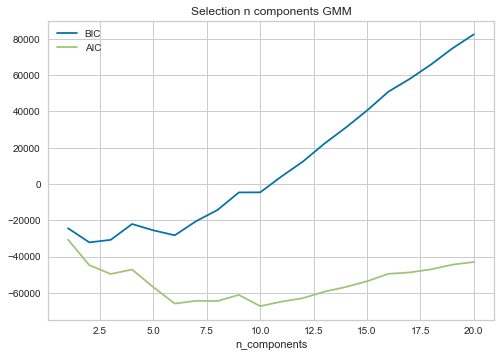

In [192]:
GMM_Comp_sisben_2022(data_components,n_components)


In [239]:
components = 6
GMM_labels_2022 = GMM_sisben_2022(data_components,components)


In [ ]:
GMM_labels_sisben_2022 = final_clusters(GMM_labels_2022)

In [245]:
sisben_2022_grouped["Cluster"] = GMM_labels_2022
df_clustered_GMM_2022 = sisben_2022_grouped

In [246]:
df_clustered_GMM_2022 = df_clustered_GMM_2022.drop(['cod_dpto', 'cod_mpio', 'Cod_vereda','Latitud', 'Longitud'],axis=1)

In [20]:
x = pd.read_csv("df_clustered_GMM_2022.csv",delimiter="~", encoding = 'latin1')

(288, 1)
Cluster
4          135
0           79
2           38
5           20
1           15
3            1
dtype: int64


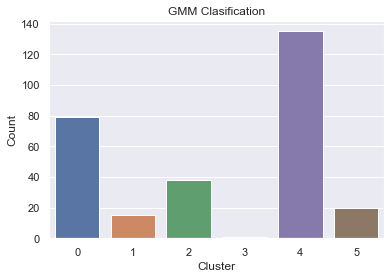

<Figure size 432x288 with 0 Axes>

In [27]:
GMM_labels_2022 = x["Cluster"]
GMM_labels_sisben_2022 = final_clusters(GMM_labels_2022)

In [248]:
df_clustered_GMM_2022["Cluster"].value_counts()

4    135
0     79
2     38
5     20
1     15
3      1
Name: Cluster, dtype: int64

In [249]:
df_clustered_GMM_2022.to_csv("df_clustered_GMM_2022.csv", sep="~", index=False, encoding = "latin1")